# **Cinematic Moral Dilemmas**

# **Team Adarable**  


Main Jupyter Notebook files with first results of the project and our data story.

# Table of Contents

- [**1. Imports**](#**1-imports**)

- [**2. First Explorations**](#**2-first-explorations**)
    - [2.1. Checking samples](#**21-checking-samples**)
    - [2.2. Rename the columns](#**22-rename-the-columns**)
    - [2.3. Missing box office revenues in CMU corpus dataset](#**23-missing-box-office-revenues-in-cmu-corpus-dataset**)

- [**3. Preprocessing**](#**3-preprocessing**)  
      - [3.1.  Cleaning of movies dataframe](#**31--cleaning-of-movies-dataframe**)  
      - [3.2. Preprocessing of the summaries](#**32-preprocessing-of-the-summaries**)    
      - [3.3. Loading and handling of Kaggle IMDb 5000 Movie Dataset](#**33-loading-and-handling-of-kaggle-imdb-5000-movie-dataset**)  
      - [3.4. Using Kaggle IMDb 5000 Movie Dataset to fill in missing box office revenues](#**34-using-kaggle-imdb-5000-movie-dataset-to-fill-in-missing-box-office-revenues**)  
      - [3.5 Additional features with web scraping for the movies](#**35-additional-features-with-web-scraping-for-the-movies**)  
      - [3.5. Cleaning of summaries dataframe](#**35-cleaning-of-summaries-dataframe**)  
      - [3.6. Keeping only movies with an available box office revenue and plot summary](#**36-keeping-only-movies-with-an-available-box-office-revenue-and-plot-summary**)  

- [**4. First Visualisations after preprocessing**](#**4-First-Visualisations-after-preprocessing**)
  - [4.1 Movie global release years](#**41-movie-global-release-years**)
  - [4.2 Total box office revenues per year](#**42-total-box-office-revenues-per-year**)
  - [4.3 Which countries are producing movies ?](#**43-which-countries-are-producing-movies-?**)
  - [4.4 Which countries are producing movies ?](#**44-which-countries-are-producing-movies-?**)

- [**5. Analyses of how genres are related to box offices revenues and commercial success**](#**5.-Analyses-of-how-genres-are-related-to-box-offices-revenues-and-commercial-success**)

- [**6. Extracting a Plot Structure for the plot summaries**](#**6-extracting-a-plot-structure-for-the-plot-summaries**)
  - [6.1 Clustering](#**61-clustering**)
    - [Vectorization of the summaries](#vectorization-of-the-summaries)
    - [Clustering using KMeans](#clustering-using-kmeans)
    - [Interpretation of Cluster Themes](#interpretation-of-cluster-themes)
  - [6.2 Large Language Model (LLM) Classification](#**62-large-language-model-(llm)-classification**)
    - [6.3.1 Summarization](#631-summarization)
    - [6.3.2 Zero-shot Classification](#632-zero-shot-classification)
    - [6.3.3 Try classification with different categories](#633-try-classification-with-different-categories)  
  - [6.3 Classification and movie revenues and profit based on plot structures](#**63-classification-revenue**)
- [**7. Inflation over the years**](#**7-inflation**)  
- [**8. Characters**](#**8-character**)


# **1. Imports**


Main packages are imported here, other packages are imported in 

In [48]:
import sys  
import seaborn as sns  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.colors as mcolors  
import ast    
import json  
import os  
import math 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity  

# Download necessary NLTK data (run once if needed)
nltk.download('punkt')        # For tokenization
nltk.download('stopwords')    # For stopwords
nltk.download('wordnet')      # For lemmatization
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer



# Initialize necessary NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()  # For Lemmatization
stemmer = PorterStemmer()         # For Stemming (optional)

sys.path.append('src') 


# Importing all the functions from the preprocessing.py files, 
# the latter are referenced in sources (src) folder 
from src.preprocessing import *   

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/svenhominal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/svenhominal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/svenhominal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Let's first explore the data 

# **2. First Explorations**


### **2.1. Checking samples**

Let's import some files given in the corpus, two datasets (movies, characters) are in the format .tsv and the three other ones (name_clusters, summaries, tv_tropes).  

In [5]:
# Change the path accordingly to the location of the data
movies = pd.read_csv('data/MovieSummaries/movie.metadata.tsv', sep='\t', header=None)
characters = pd.read_csv('data/MovieSummaries/character.metadata.tsv', sep = '\t', header = None)

# Importing txt files
name_clusters = pd.read_csv('data/MovieSummaries/name.clusters.txt', sep = '\t', header = None)
summaries = pd.read_csv('data/MovieSummaries/plot_summaries.txt', sep = '\t', header = None)
tv_tropes = pd.read_csv('data/MovieSummaries/tvtropes.clusters.txt', sep = '\t', header = None)  

First check of the data, in dataset movies, to see the initial structure and main informations of datasets

In [6]:
movies.sample(2)

,0,1,2,3,4,5,6,7,8
13047,18066046,/m/047tkyq,Being Two Isn't Easy,1962,NaN,88.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/07s9rl0"": ""Drama"", ""/m/0gw5n2f"": ""Japanes..."
25337,10122929,/m/04j2q5_,DysFunktional Family,2003,NaN,84.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01z4y"": ""Comedy"", ""/m/0q00t"": ""Stand-up c..."


Similarly, for the other datasets :

In [7]:
characters.sample(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
329317,11188887,/m/02r31r_,NaN,Buzz Stafford,1941-02-08,M,1.85,/m/03bkbh,Nick Nolte,NaN,/m/03kyv3j,/m/05nd8vq,/m/0lkr7
28537,19539381,/m/04n3v8k,2009,Neil,1977-07-24,M,1.83,/m/02w7gg,Danny Dyer,31.0,/m/04q3_51,/m/0h29yhs,/m/065j4h


In [8]:
name_clusters.sample(2)

,0,1
1634,Esther Blodgett,/m/0jsxlp
2268,Jill Valentine,/m/0gvzqlt


In [360]:
summaries.head(2)

,0,1
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...


In [361]:
tv_tropes.sample(2)

,0,1
418,self_made_man,"{""char"": ""George Kittredge"", ""movie"": ""The Phi..."
370,ophelia,"{""char"": ""Jane Olsen"", ""movie"": ""The Cabinet o..."


Let's rename the column to be consistent with the data given.

### **2.2. Rename the columns** 

Let's rename the columns according to what is in the README of the initial dataset.

In [7]:
movies.columns = ['wikipedia_movie_id', 'freebase_movie_id', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
name_clusters.columns = ['name', 'freebase_movie_id']        
summaries.columns = ['wikipedia_movie_id', 'plot_summary']
characters.columns = ['wikipedia_movie_id', 'freebase_movie_id', 'movie_release_date', 'character_name', 'actor_birth', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age', 'freebase_character_map', 'freebase_character_id', 'freebase_actor_id']
tv_tropes.columns = ['trope', 'details']

Check unique entries for movie countries

In [8]:
movies['movie_countries'].unique()  

array(['{"/m/09c7w0": "United States of America"}',
       '{"/m/05b4w": "Norway"}', '{"/m/07ssc": "United Kingdom"}', ...,
       '{"/m/0f8l9c": "France", "/m/06mzp": "Switzerland", "/m/0h3y": "Algeria", "/m/0345h": "Germany"}',
       '{"/m/014tss": "Kingdom of Great Britain", "/m/03_3d": "Japan", "/m/02jx1": "England", "/m/07ssc": "United Kingdom", "/m/0345h": "Germany"}',
       '{"/m/06mzp": "Switzerland", "/m/03rjj": "Italy", "/m/082fr": "West Germany", "/m/03f2w": "German Democratic Republic"}'],
      dtype=object)

### **2.3. Missing box office revenues in CMU corpus dataset**

Let's check for potential missing value in the movies dataset 

In [9]:
print((movies.isna().sum() / movies.shape[0]) * 100)

# in movie_language, movie_genre and movie_countries, we check the percentage of empty lists
print("Percentage of empty languages: ", (movies['movie_languages'].apply(len) == 0).sum() / movies.shape[0] * 100)
print("Percentage of empty genres: ", (movies['movie_genres'].apply(len) == 0).sum() / movies.shape[0] * 100)
print("Percentage of empty countries: ", (movies['movie_countries'].apply(len) == 0).sum() / movies.shape[0] * 100)

wikipedia_movie_id           0.000000
freebase_movie_id            0.000000
movie_name                   0.000000
movie_release_date           8.443743
movie_box_office_revenue    89.722416
movie_runtime               25.018045
movie_languages              0.000000
movie_countries              0.000000
movie_genres                 0.000000
dtype: float64
Percentage of empty languages:  0.0
Percentage of empty genres:  0.0
Percentage of empty countries:  0.0


How many movies are in the initial dataset, and how many of them do have their revenue available for analyses ?

In [10]:
print(f"Number of movies available: {movies.shape[0]}")
print(f"Number of movies with available box office: {movies['movie_box_office_revenue'].notna().sum()}")

Number of movies available: 81741
Number of movies with available box office: 8401


Noticing here that there are almost 90% of movies that do not have revenue in the CMU movie dataset, this is an issue for our project, as we want to investigate how different plot structures and narrative formulas affect a movie’s box office success. An other dataset will be used to get this information.  Further methods during preprocessing will be used, such as merging with full IMDb dataset and web scraping on IMBd, to complete these missing values.

The new dataset will be composed of much less movies, but still, it is sufficient to conduct a concrete analysis of influence of plot summaries on rentability of movies.    

Some other exploratory data visualisations may be found in the EDA folder of the present notebook. Let's now preprocess the data.

# **3. Preprocessing**


The code and main functions for preprocessing can be found in the preprocessing.py file in the repository. We go through and explain the methods used here. <br>  

### **3.1.  Cleaning of movies dataframe**

We notice that for the languages, genres and countries features we have dictionaries with freebase ids. We uniformize the dataframe into lists. This function can also be found in preprocessing.py file


In [11]:
def extract_dict_to_list(entry):
    """
    Extracts values from a dictionary-like string and returns a list of values.
    """
    try:
        entry_dict = ast.literal_eval(entry)
        return list(entry_dict.values())
    except (ValueError, SyntaxError):
        return []

movies['movie_countries'] = movies['movie_countries'].apply(extract_dict_to_list)
movies['movie_genres'] = movies['movie_genres'].apply(extract_dict_to_list)
movies['movie_languages'] = movies['movie_languages'].apply(extract_dict_to_list)

In [12]:
movies.sample(2)

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
68452,33654277,/m/0hgpw8l,Motherland,1927,NaN,104.0,[],[United Kingdom],"[Silent film, War film]"
32067,10617098,/m/02qkbs6,Bees Saal Baad,1962,NaN,NaN,[Hindi Language],[India],[Bollywood]


Now, countries, genres and languages are in the form of lists and it will be much more useful and easy to use for further analyses.  

We also convert the dates of the 'movie_release_date' feature into a unique format. Noticing some of the dates only contain the year, we decide to keep only the year for every movie since the month and day won't be relevant for our analysis. The feature is then converted to an integer type.

For the tv_tropes dataframe, we notice that for the character, movie, freebase_movie_id and actor we have dictionaries which we uniformize into lists.

In [13]:
tv_tropes['details'] = tv_tropes['details'].apply(eval)
tv_tropes = tv_tropes.join(pd.json_normalize(tv_tropes['details'])).drop(columns=['details'])

In [14]:
tv_tropes.sample(2)

,trope,char,movie,id,actor
349,master_swordsman,Darth Vader,Star Wars Episode V: The Empire Strikes Back,/m/02nwtmm,James Earl Jones
76,byronic_hero,Tony Stark,Iron Man,/m/0j1__hv,Robert Downey Jr.


We rename the columns according to the descriptions in the README.

In [15]:
tv_tropes.columns = ['trope', 'character_name', 'movie_name', 'freebase_movie_id', 'actor_name']

We convert the dates into a unique format: datetime format. We also observe some of the dates only contain the year. We decide to keep only the year since the month and day won't be relevant for our analysis.

In [16]:
def extract_release_year(date_str):
    """
    Extracts the year from a date string.
    """
    try:
        return pd.to_datetime(date_str).year
    except (ValueError, TypeError):
        try:
            return int(date_str)
        except ValueError:
            return None

movies['movie_release_date'] = movies['movie_release_date'].apply(extract_release_year).astype(pd.Int64Dtype())


### **3.2. Preprocessing of the summaries**


ICI ADAM TU MAS DIT VOUS AVEZ UN NOUVEAU PREPROCESSING DES SUMMARIES AVEC ANDERS, PUET ETRE LEXPLIQUER ICI

### **3.3. Loading and handling of Kaggle IMDb 5000 Movie Dataset**


We download the dataset using the kagglehub library and save it to the local repository (the methods used are in preprocessing.py file)

In [17]:
imdb_movies = pd.read_csv('data/raw/imdb_5000_movies.csv')  


In [18]:
imdb_movies['movie_title'].sample(2)

309     Batman Forever 
2628      Big Fat Liar 
Name: movie_title, dtype: object

In [19]:
imdb_movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

- The relevant features of this dataset for our analysis are: movie_title, title_year and gross (revenue). We put the movie_title feature in the appropriate format to allow merging with the movies dataframe, we convert the title_year feature to integer type and convert to gross feature to numeric type.


In [20]:
imdb_movies['movie_title'] = imdb_movies['movie_title'].str.strip().str.replace(u'\xa0', '')

# Convert title_year to integer type, handling missing values as pd.NA
imdb_movies['title_year'] = imdb_movies['title_year'].fillna(0).astype(int).replace({0: pd.NA})
imdb_movies = imdb_movies[['movie_title', 'title_year', 'gross']]

# Convert 'gross' to numeric
imdb_movies['gross'] = pd.to_numeric(imdb_movies['gross'], errors='coerce')
imdb_movies = imdb_movies.dropna(subset=['gross'])

- Now both dataframes have appropriate data types for merging.

### **3.4. Using Kaggle IMDb 5000 Movie Dataset to fill in missing box office revenues**

Since the Kaggle IMDB 5000 Movie Dataset doesn't contain the wikipedia_movie_id, we merge the dataframes on the movie_name as well as the release_year. However, after inspection of the movies dataframe, we observe that that are duplicates on this subset that will cause issues with the merging. We observe exacly 27 cases of duplicates on this subset, all of them having at least one of the duplicates with a missing value in the movie_box_office_revenue column. <br> <br>
However we notice some cases where the movies dataframe has duplicates on the subset and where there is an instance of this duplicate in the imdb_movies dataframe as well.  <br><br>
We observe that there are 27 instances where two movies are associated with the same box office revenue value after merging datasets. In these cases, at least one of the movies has a missing value for box office revenue. The problem is that this duplication makes it ambiguous and unreliable to fill in the missing box office revenue value using data from the IMDB dataset. Since the merged data links a single box office revenue figure to two different movies, we can't be sure which movie the revenue value truly belongs to. As a result, using that value could potentially be incorrect.


We identify the duplicates on the ['movie_name', 'movie_release_date'] subset in the movies dataframe and check if they are also in the imdb_movies dataframe. We identify the pairs that have a missing value in the movie_box_office_revenue_column.

In [21]:
# Group by on the ['movie_name', 'release_year'] subset in movies and count occurrences
duplicate_combinations = movies.groupby(['movie_name', 'movie_release_date']).size()
duplicates = duplicate_combinations[duplicate_combinations > 1].index

# Get the actual duplicates
duplicate_rows_in_movies = movies[movies[['movie_name', 'movie_release_date']].apply(tuple, axis=1).isin(duplicates)]

# Check if these duplicates are also in imdb_movies
matching_duplicates = duplicate_rows_in_movies[
    duplicate_rows_in_movies[['movie_name', 'movie_release_date']].apply(tuple, axis=1).isin(
        imdb_movies[['movie_title', 'title_year']].apply(tuple, axis=1)
    )
]

count_pairs_having_nan = 0
count_pairs_not_having_nan = 0
count_corresponding_imdb_movies = 0

# Find the cases that will lead to potential issues during merge
if not matching_duplicates.empty:
    for i, row in matching_duplicates.iterrows():
        sample_combination = row[['movie_name', 'movie_release_date']]

        sample_movies = movies[
            (movies['movie_name'] == sample_combination['movie_name']) &
            (movies['movie_release_date'] == sample_combination['movie_release_date'])
        ]

        if sample_movies['movie_box_office_revenue'].notnull().sum() == len(sample_movies):
            sample_imdb_movies = imdb_movies[
                (imdb_movies['movie_title'] == sample_combination['movie_name']) &
                (imdb_movies['title_year'] == sample_combination['movie_release_date'])
            ]
            count_pairs_not_having_nan += 1
        elif sample_movies['movie_box_office_revenue'].notnull().sum() != len(sample_movies):
            sample_imdb_movies = imdb_movies[
                (imdb_movies['movie_title'] == sample_combination['movie_name']) &
                (imdb_movies['title_year'] == sample_combination['movie_release_date'])
            ]
            count_pairs_having_nan += 1
            count_corresponding_imdb_movies += sample_imdb_movies.shape[0]
else:
    print("No duplicates found in movies that also match imdb_movies.")

In [22]:
# get the files here ....

print(f"Number of duplicates on subset: {len(matching_duplicates)}")
print(f"Duplicates with at least 1 missing value for box office revenue: {count_pairs_having_nan}")
print(f"Duplicates with no missing values for box office revenue: {count_pairs_not_having_nan}")
print(f"Count of corresponding imdb movies: {count_corresponding_imdb_movies}, meaning exactly 1 per duplicate")

Number of duplicates on subset: 27
Duplicates with at least 1 missing value for box office revenue: 27
Duplicates with no missing values for box office revenue: 0
Count of corresponding imdb movies: 27, meaning exactly 1 per duplicate


After inspection we decide to remove the movies part of these duplicate cases that do not have an available box office revenue. This is because the revenue available in imdb_movies dataframe has at most a 50% chance of being the revenue associated with the same movie based on the information given. Removing a total of 15 movies from the movies dataframe.

In [23]:
# Remove appropriate movies from movies
movies_to_remove = matching_duplicates[matching_duplicates['movie_box_office_revenue'].isna()]
movies = movies[~movies['wikipedia_movie_id'].isin(movies_to_remove['wikipedia_movie_id'])]

# Print the number of movies removed
print(f"Number of movies removed: {len(movies_to_remove)}")

Number of movies removed: 15


We now complete missing values of box office in the movies dataframe using the kaggle 5000 Movie Dataset for unambiguous cases.

In [24]:
# Convert 'movie_box_office_revenue' to numeric, handling missing values
movies['movie_box_office_revenue'] = pd.to_numeric(movies['movie_box_office_revenue'], errors='coerce')

# Merge on both 'movie_name' and 'movie_release_date' to differentiate versions
merged_movies = pd.merge(
    movies, imdb_movies,
    left_on=['movie_name', 'movie_release_date'],
    right_on=['movie_title', 'title_year'],
    how='left'
)

# Update 'movie_box_office_revenue' where it's NaN with 'gross' from IMDB
merged_movies['movie_box_office_revenue'] = merged_movies['movie_box_office_revenue'].fillna(merged_movies['gross'])
merged_movies.drop(columns=['movie_title', 'gross'], inplace=True)
merged_movies = merged_movies.dropna(subset=['movie_box_office_revenue'])

We identify all of the cases and decide to remove all movies from those duplicate cases that have a missing value for box office, we end up removing a total of 15 movies from the movies dataframe.

After having removed these movies, we fill in box office revenue values missing using the ones available on the IMDB dataset. We end up adding a total of 538 values, for a total of 8939 movies with a box office revenue available.

In [25]:
print(f"Number of movies with available box office revenue: {movies['movie_box_office_revenue'].notna().sum()}")
print(f"Number of movies available after merge with IMDB: {merged_movies.shape[0]}")
print(f"Count of values filled: {merged_movies.shape[0]-movies['movie_box_office_revenue'].notna().sum()}")

Number of movies with available box office revenue: 8401
Number of movies available after merge with IMDB: 8939
Count of values filled: 538


### **3.5 Keeping only movies with an available box office revenue and plot summary**

We have a total of 8401 films with box office revenue. In order to do our analysis, we also need the plot summaries of every one of those movies. We filter the dataframe obtained previously to have only movies with an available plot summary remaining.

In [26]:
common_index = merged_movies['wikipedia_movie_id'].isin(summaries['wikipedia_movie_id'])
filtered_movies_summaries_BO = merged_movies[common_index]
# We remove duplicates
filtered_movies_summaries_BO = filtered_movies_summaries_BO.drop_duplicates(subset='wikipedia_movie_id', keep='first')

In [27]:
filtered_movies_summaries_BO.shape[0]

7964

We are left with 7964 movies to which we add the plot summaries in the dataframe.

In [28]:
filtered_movies_summaries_BO = filtered_movies_summaries_BO.merge(
    summaries[['wikipedia_movie_id', 'plot_summary']],
    on='wikipedia_movie_id',
    how='left'
)

### **3.6 Additional features with web scraping for the movies**

In order to complete our dataset with additional features that can be useful for further analysis, a web scraping method that accesses IMDB movies web pages and extracts selected information on them was used. <br>The additional features extracted from this web scraping technique are: budget, opening_weekend, rating_score, number_of_ratings, producer.

EXPLIQUER WEB SCRAPING UN PEU MIEUX ICI PEUT ETRE ? 


Note: The web scraping takes several hours to run using the GPU provided on google colab. The code for the method can be found in the imdb_scraper.py and scrapping.ipynb files in the repository, to create a CSV file. <br>
<br>
We simply read the resulting csv as a dataframe here.

In [ ]:
scraped_data = pd.read_csv('src/data/processed/scraped_data_all.csv')

In [ ]:
def add_scraped_features(filtered_movies_summaries_BO):
    """
    Add features obtained from scraping on the movies with summaries and box office available.
    """
    # Load the new imdb_additional_movies_data_left_1.csv
    scraped_data = pd.read_csv('src/data/processed/scraped_data_all.csv')

    # Merge the two DataFrames on 'wikipedia_movie_id'
    movies_scraped_data = pd.merge(filtered_movies_summaries_BO, scraped_data, on='wikipedia_movie_id', how='left')

    # Ensure there are no duplicates on 'wikipedia_movie_id'
    movies_scraped_data = movies_scraped_data.drop_duplicates(subset=['wikipedia_movie_id'])

    return movies_scraped_data

In [31]:
filtered_movies_summaries_BO_scraped = add_scraped_features(filtered_movies_summaries_BO)

We find that 37 of the movies do not have a valid url on IMDB corresponding to their wikipedia_movie_id, we decide to keep them although they won't be available for analyses on the extra features obtained through web scraping.

In [32]:
columns_to_check = [
    'Unnamed: 0', 'movie_box_office_revenue_y', 'budget',
    'opening_weekend', 'rating_score', 'producer', 'release_year'
]

# Filter movies where all the specified columns are empty
movies_with_missing_values = filtered_movies_summaries_BO_scraped[filtered_movies_summaries_BO_scraped[columns_to_check].isnull().all(axis=1)]

# Print number of movies with no valid IMDB url
print("Movies with missing values in the specified columns:")
print(movies_with_missing_values.shape[0])

Movies with missing values in the specified columns:
37


In [33]:
filtered_movies_summaries_BO_scraped.columns

Index(['wikipedia_movie_id', 'freebase_movie_id', 'movie_name',
       'movie_release_date', 'movie_box_office_revenue_x', 'movie_runtime',
       'movie_languages', 'movie_countries', 'movie_genres', 'title_year',
       'plot_summary', 'Unnamed: 0', 'movie_box_office_revenue_y', 'budget',
       'opening_weekend', 'rating_score', 'producer', 'release_year'],
      dtype='object')

We remove useless columns obtained from the web scraping and rename movie_box_office_revenue_x to movie_box_office_revenue to keep column names coherent within the notebook.

In [34]:
filtered_movies_summaries_BO_scraped.drop(columns=['Unnamed: 0', 'movie_box_office_revenue_y', 'release_year'], inplace=True)
filtered_movies_summaries_BO_scraped.rename(columns={'movie_box_office_revenue_x': 'movie_box_office_revenue'}, inplace=True)

ADD ELEMENTS

# **4. First Visualisations after preprocessing**



Loading the two clean CSV files after preprocessing so that clean data is used for first analyses. There are composed of less movies, but their distributions is sufficient for the purpose of the project, and this avoid taking to much time to run the scraping on IMDb website and word analysis on the plot summaries.

In [83]:
# The CSV runned here already takes into account four more columns resulting from scraping, this will 
# updated in preprocessing file with a merge function when scraping is done
movies = pd.read_csv('data/processed/modified_merged_movies.csv', sep=',')

Ensuring the movies dataframe has the correct for the first visualizations

Starting by using the results of preprocessing, of the CSV `modified_merged_movies.csv`

In [17]:
len(movies)

8889

On this dataset, before integrating the results from the scrapping, we conduct some analyses :

## **4.1 Movie global release years**

First Visualization of Movie global release years  

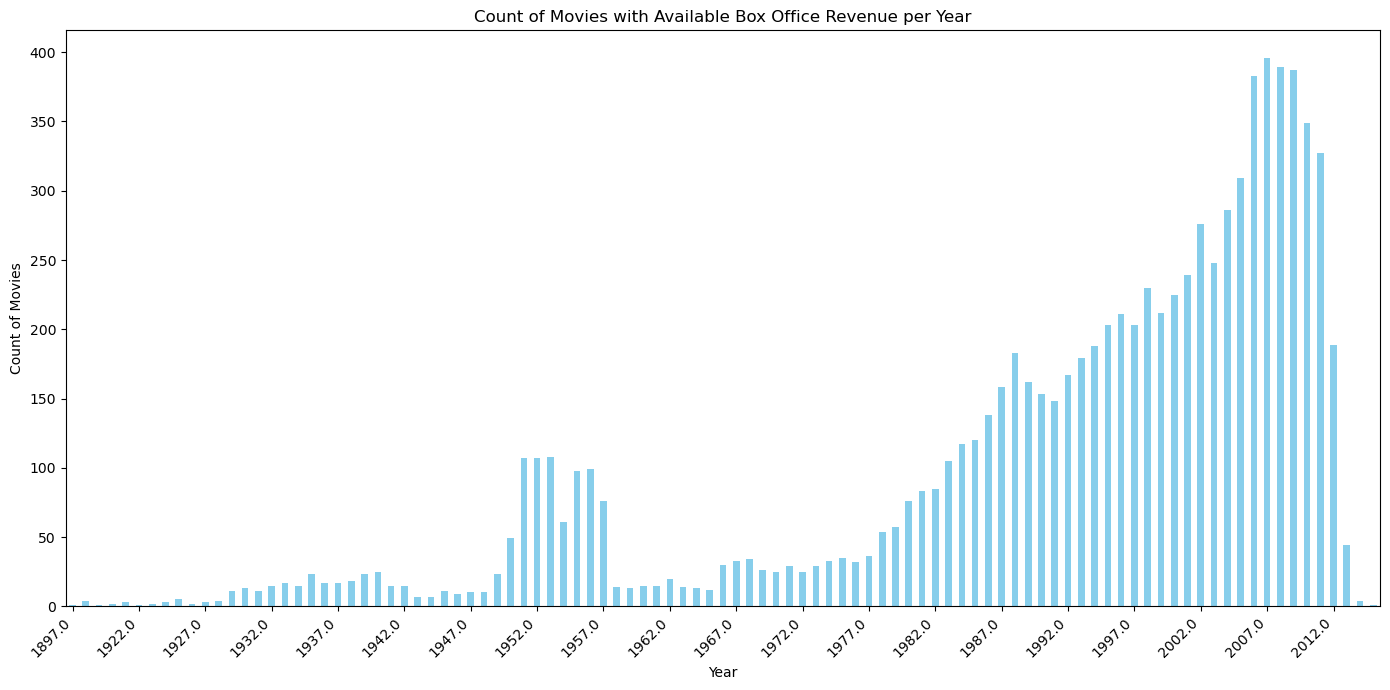

In [18]:
# Group by release year and count the movies with available revenue
revenue_counts_by_year = movies.groupby('movie_release_date').size()

# Plot the counts of movies with available box office revenue by year
plt.figure(figsize=(14, 7))
revenue_counts_by_year.plot(kind='bar', color='skyblue')

# Update x-axis for readability
plt.title('Count of Movies with Available Box Office Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate labels at a 45-degree angle for readability

# Optionally display fewer labels, e.g., every 5 years
plt.xticks(ticks=range(0, len(revenue_counts_by_year), 5), 
           labels=revenue_counts_by_year.index[::5])
plt.grid(False)
plt.tight_layout()
plt.show()  

A significant number of movies are produced after the years 1990.  

## **4.2 Total box office revenues per year**

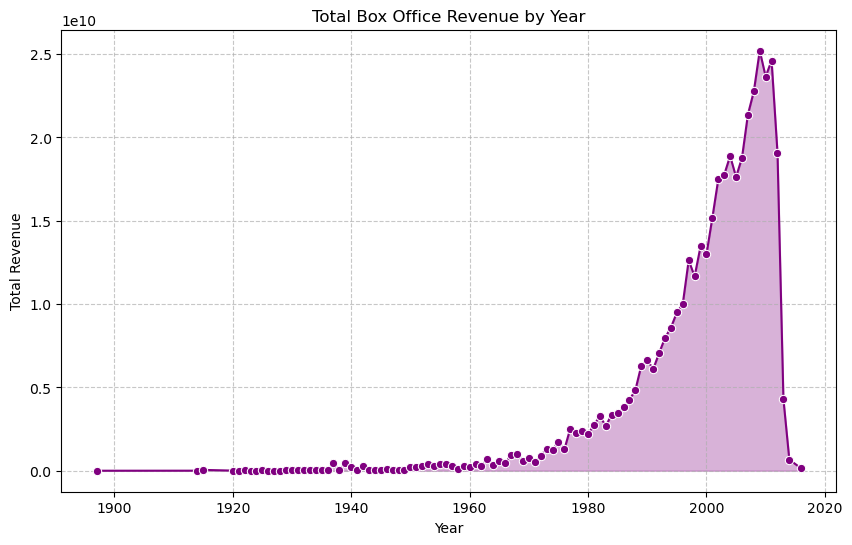

In [391]:
# Total Box Office Revenue by Year
revenue_by_year = movies.groupby('movie_release_date')['movie_box_office_revenue_x'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_by_year, x='movie_release_date', y='movie_box_office_revenue_x', marker='o', color='purple')
plt.fill_between(revenue_by_year['movie_release_date'], revenue_by_year['movie_box_office_revenue_x'], color='purple', alpha=0.3)
plt.title('Total Box Office Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## **4.3 Which countries are producing movies ?**

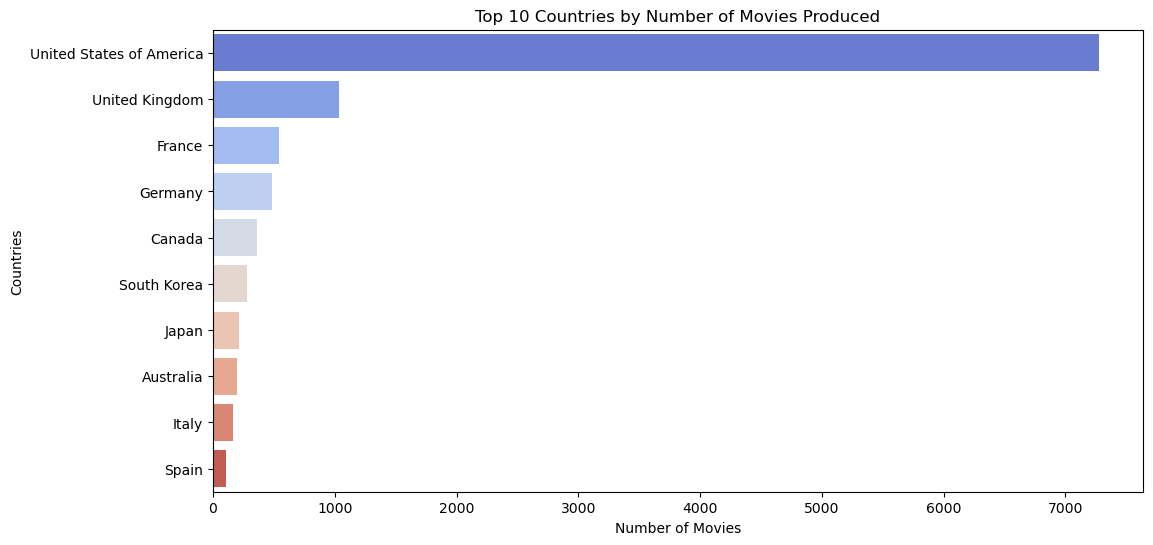

In [392]:
# Ensure that the movie_countries column is parsed as lists
movies['movie_countries'] = movies['movie_countries'].apply(ast.literal_eval)

# Filter out rows with empty countries
movies = movies[movies['movie_countries'].map(len) > 0]

# Top 10 Countries by Number of Movies Produced
movies_countries_exploded = movies.explode('movie_countries')
top_countries = movies_countries_exploded['movie_countries'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Movies Produced')
plt.xlabel('Number of Movies')
plt.ylabel('Countries')  
plt.grid(False)
plt.show()  

## **4.4 What are the languages in movies ?**

<Figure size 1500x1000 with 0 Axes>

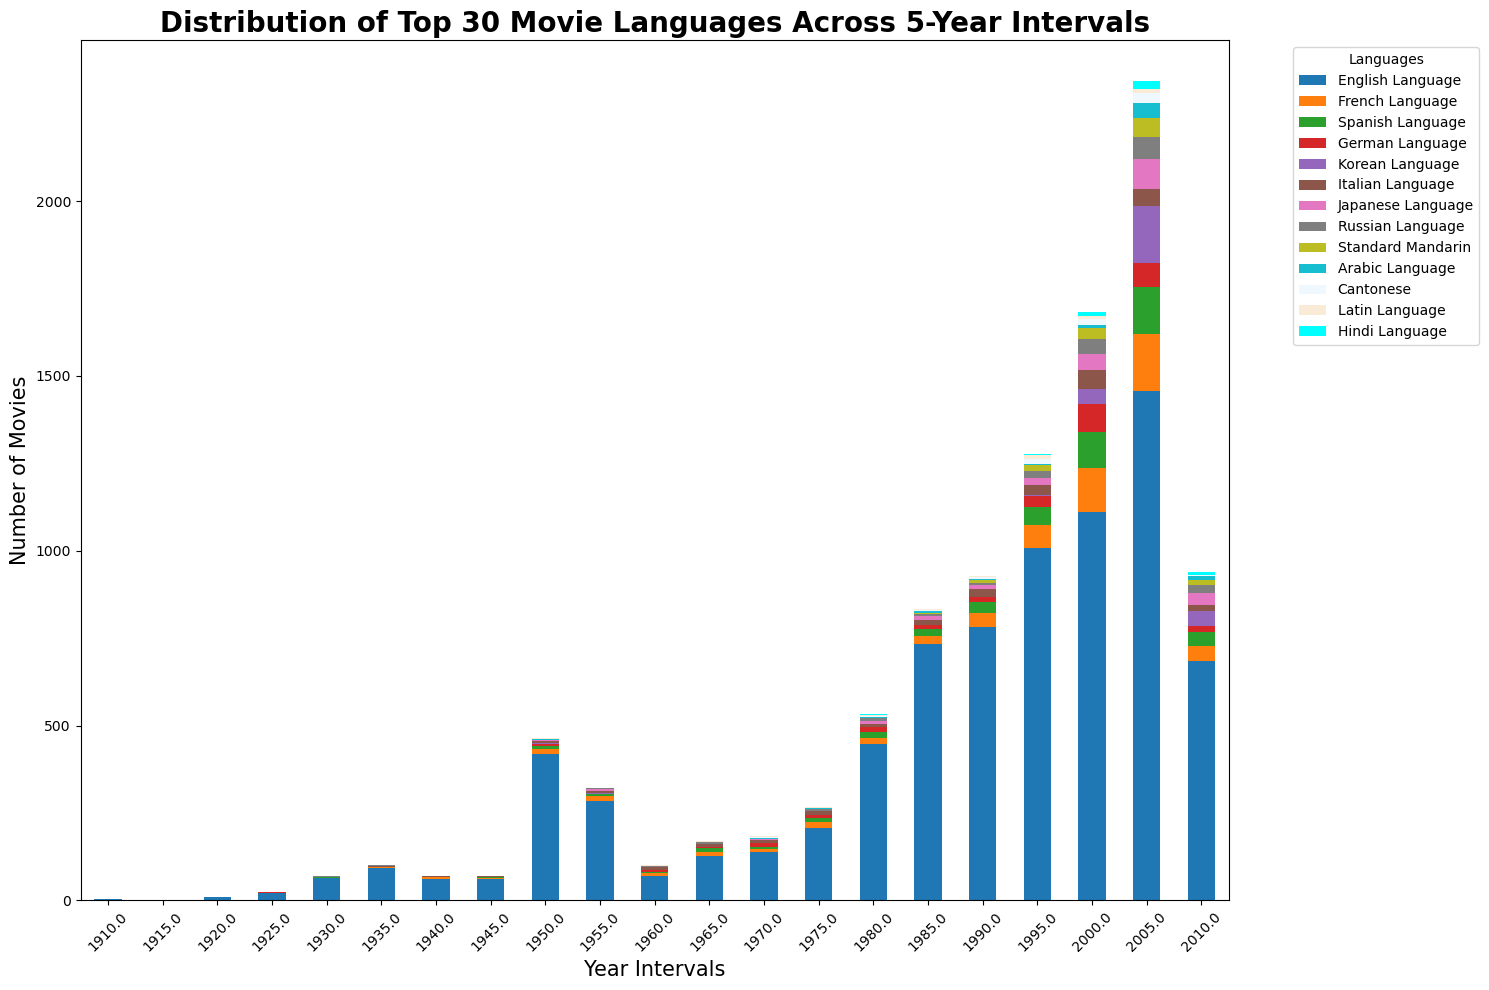

In [393]:
# Implement here a function just to correctly parse the lists in the 'movie_languages' column
def safe_literal_eval(val):
	try:
		return ast.literal_eval(val)
	except (ValueError, SyntaxError):
		return val

movies['movie_languages'] = movies['movie_languages'].apply(safe_literal_eval)

movies['year_interval'] = (movies['movie_release_date'] // 5) * 5  

movies_languages_exploded = movies.explode('movie_languages')

# Create pivot tables with the count of each genre and language per 5-year interval
language_year_pivot = movies_languages_exploded.pivot_table(index='year_interval', columns='movie_languages', aggfunc='size', fill_value=0)

language_counts = movies_languages_exploded['movie_languages'].value_counts()
valid_languages = language_counts[language_counts >= 50].index
language_year_pivot = language_year_pivot[valid_languages]  

# Define a custom colormap with 30 distinct colors
colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
custom_colormap = colors[:30]

# Plot the stacked bar plot for languages
plt.figure(figsize=(15, 10))
language_year_pivot.plot(kind='bar', stacked=True, color=custom_colormap, figsize=(15, 10))

# Add titles and labels
plt.title('Distribution of Top 30 Movie Languages Across 5-Year Intervals', fontsize=20, fontweight='bold')
plt.xlabel('Year Intervals', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

The English language is indeed the most used in movie industry.  

Some more statistical analyses on the dataset :  

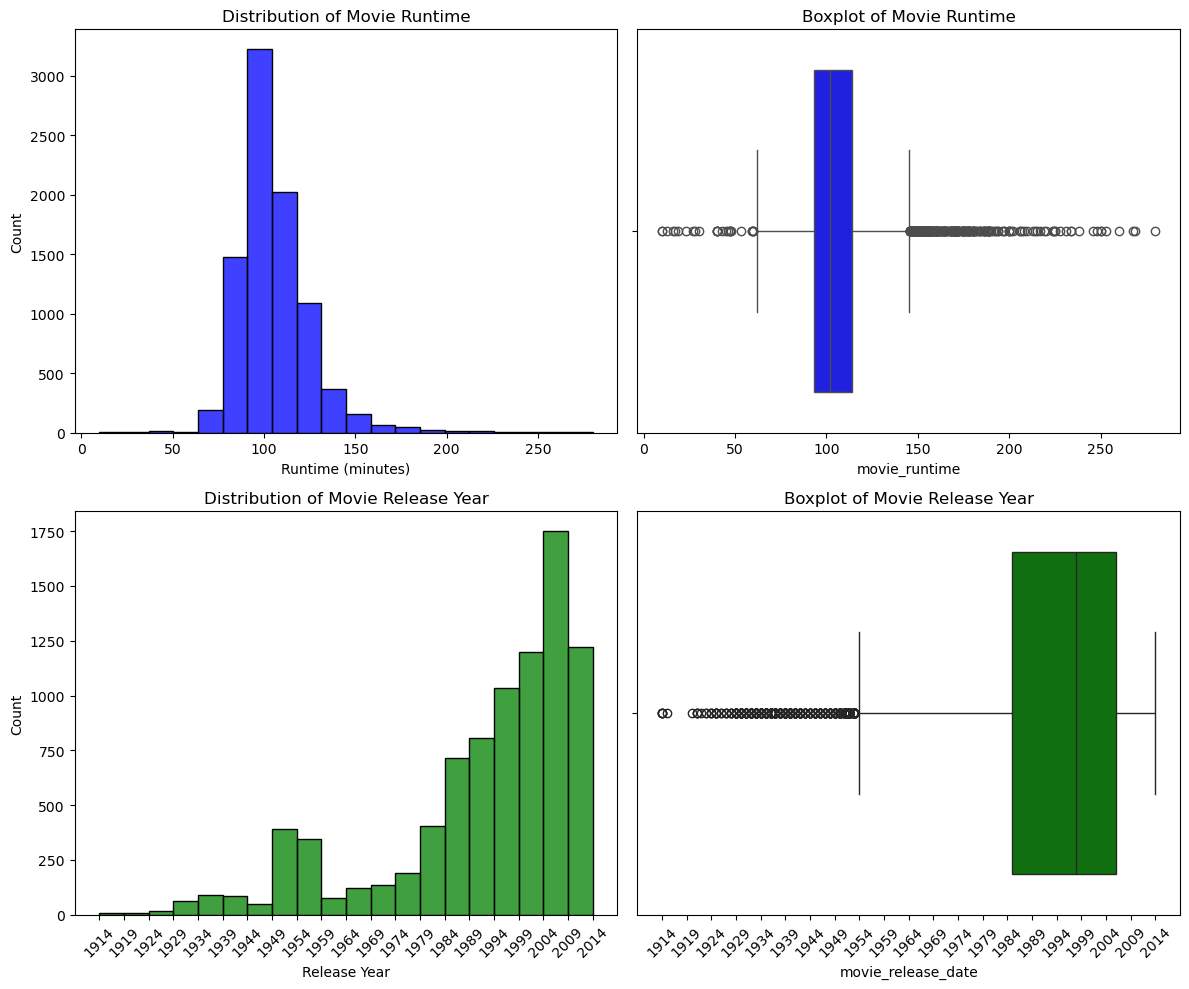

In [394]:
# Create a figure with subplots (2x2 layout)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  

# Plot distribution of movie runtime (no KDE and fewer bins)
sns.histplot(movies[movies['movie_runtime'] < 300]['movie_runtime'].dropna(), kde=False, bins=20, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Movie Runtime')
axes[0, 0].set_xlabel('Runtime (minutes)')  
axes[0, 0].grid(False)  


# Boxplot for movie runtime
sns.boxplot(x=movies[movies['movie_runtime'] < 300]['movie_runtime'].dropna(), ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Boxplot of Movie Runtime')  
axes[0, 1].grid(False)


# Plot distribution of release year (no KDE and fewer bins)
sns.histplot(movies['movie_release_date'].dropna(), kde=False, bins=20, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribution of Movie Release Year')
axes[1, 0].set_xlabel('Release Year')
axes[1, 0].set_xticks(np.arange(movies['movie_release_date'].min(), movies['movie_release_date'].max()+1, 5))
axes[1, 0].tick_params(axis='x', rotation=45)   
axes[1, 0].grid(False)


# Boxplot for movie release year
sns.boxplot(x=movies['movie_release_date'].dropna(), ax=axes[1, 1], color='green')
axes[1, 1].set_title('Boxplot of Movie Release Year')
axes[1, 1].set_xticks(np.arange(movies['movie_release_date'].min(), movies['movie_release_date'].max()+1, 5))
axes[1, 1].tick_params(axis='x', rotation=45)  
axes[1, 1].grid(False)


# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()

The United States of America are prominent in the production of movies, which is here logical, because the proprecessed dataset used is mainly based on american movies.  

# **5. Analyses of how genres are related to worldwide box offices revenues and analyses of commercial successes**
 


Now we can add analyses here based on budget / revenues / ratings when preprocessing and scraping is finished, by merging on wikipedia_movie_id key. The results from the scraping are saved in `imbd_additional_movies_correct_left_to_scrape.csv`. This is loaded in a new dataframe called merged_movies_scraped

In [21]:
# Load the datasets
movies_clean = pd.read_csv('data/processed/modified_merged_movies.csv', sep=',')
imdb_additional_movies_df = pd.read_csv('data/processed/scraped_data_all.csv')

# Merge the dataframes on 'wikipedia_movie_id'
merged_movies = pd.merge(movies_clean, imdb_additional_movies_df, on='wikipedia_movie_id')

# Drop the 'box_office_revenue' column
merged_movies = merged_movies.drop(columns=['movie_box_office_revenue'])

# Drop duplicates
merged_movies_scraped = merged_movies.drop_duplicates()

# Ensure the directory exists
output_dir = 'data/processed'
os.makedirs(output_dir, exist_ok=True)

# Save the merged dataframe to a new CSV file
merged_movies_scraped.to_csv(os.path.join(output_dir, 'merged_movies_scraped.csv'), index=False)


In [22]:
movies.head()

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue_x,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv..."
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938.0,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']"
2,171005,/m/016ywb,Henry V,1989.0,10161099.0,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ..."
3,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C..."
4,612710,/m/02wjqm,New Rose Hotel,1999.0,21521.0,92.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Future noir',..."


In [23]:
merged_movies_scraped.head()

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue_x,movie_runtime,movie_languages,movie_countries,movie_genres,Unnamed: 0,budget,opening_weekend,rating_score,producer,release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",1163,28000000.0,3804452.0,4.9,John Carpenter,2001.0
1,171005,/m/016ywb,Henry V,1989.0,10161099.0,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ...",1164,9000000.0,64933.0,7.5,Kenneth Branagh,1989.0
2,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",1165,6000000.0,NaN,7.8,Robert Stevenson,1965.0
3,612710,/m/02wjqm,New Rose Hotel,1999.0,21521.0,92.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Future noir',...",254,NaN,5147.0,5.2,Abel Ferrara,1999.0
4,156558,/m/014k4y,Baby Boy,2001.0,29381649.0,123.0,['English Language'],['United States of America'],"['Crime Fiction', 'Drama', 'Coming of age']",1166,16000000.0,8606403.0,6.5,John Singleton,2001.0


Notice here the 5 new columns : budget, opening_weekend, rating_score, producer and release_year, resulting from the IMDb website scrapping.

In [398]:
movies.head()

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue_x,movie_runtime,movie_languages,movie_countries,movie_genres,year_interval
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,[English Language],[United States of America],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",2000.0
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938.0,3600000.0,106.0,[English Language],[United States of America],"['Musical', 'Comedy', 'Black-and-white']",1935.0
2,171005,/m/016ywb,Henry V,1989.0,10161099.0,137.0,[English Language],[United Kingdom],"['Costume drama', 'War film', 'Epic', 'Period ...",1985.0
3,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,[English Language],[United States of America],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",1960.0
4,612710,/m/02wjqm,New Rose Hotel,1999.0,21521.0,92.0,[English Language],[United States of America],"['Thriller', 'Science Fiction', 'Future noir',...",1995.0


In [24]:
# Ensure that the movie_genres column is parsed as lists
def parse_genres(genres):
    if isinstance(genres, list):
        return genres
    try:
        return ast.literal_eval(genres)
    except (ValueError, SyntaxError):
        return genres.strip('[]').replace("'", "").split(', ')


# Which genres generated the highest revenues ?

/var/folders/vn/57rl296d3kj3d3mdgckts32m0000gn/T/ipykernel_19743/325666679.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='movie_box_office_revenue_x', y='movie_genres', data=revenue_by_genre.head(10), palette='viridis')


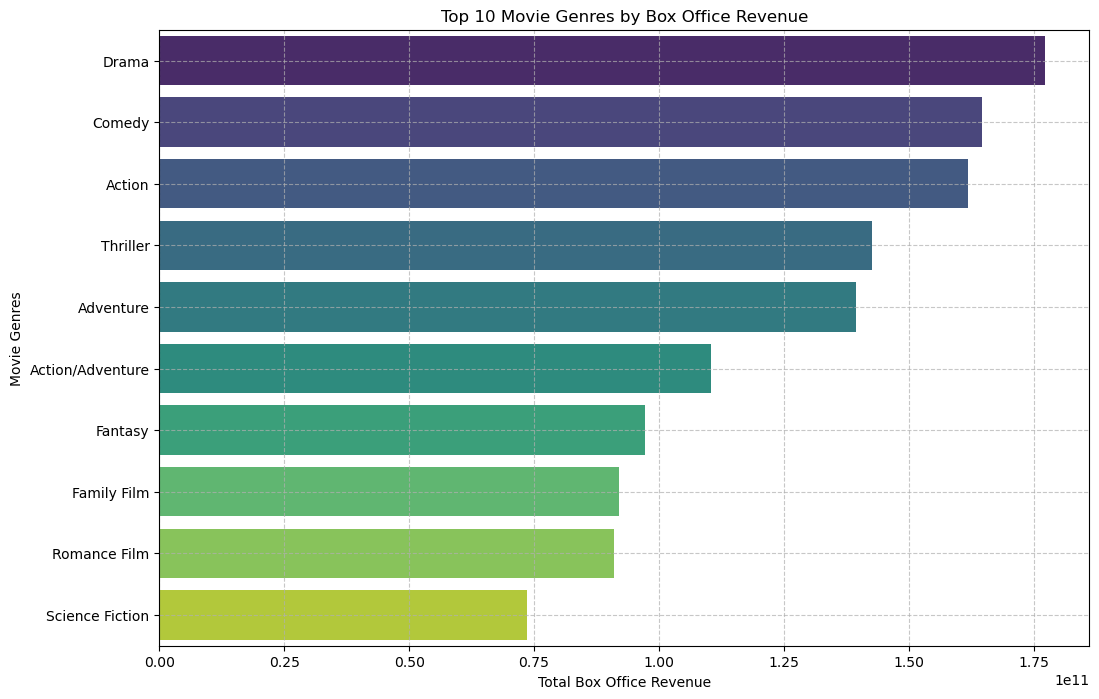

In [25]:
movies['movie_genres'] = movies['movie_genres'].apply(parse_genres)

# Explode the genres to have one genre per row
movies_genres_exploded = movies.explode('movie_genres')

# Group by genre and sum the revenues
revenue_by_genre = movies_genres_exploded.groupby('movie_genres')['movie_box_office_revenue_x'].sum().reset_index()

# Sort by revenue in descending order
revenue_by_genre = revenue_by_genre.sort_values(by='movie_box_office_revenue_x', ascending=False)

# Plot the top 10 genres by revenue
plt.figure(figsize=(12, 8))
sns.barplot(x='movie_box_office_revenue_x', y='movie_genres', data=revenue_by_genre.head(10), palette='viridis')
plt.title('Top 10 Movie Genres by Box Office Revenue')
plt.xlabel('Total Box Office Revenue')
plt.ylabel('Movie Genres')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Here the results are stacked based on a specific genre. It's noticeable that, with the data we have here, drama, comedy and action movies are the ones generating the highest revenues. What about profit ?

Now, after the scraping on IMDb website, further analyses may be conducted to analyses profit of movies, now that values of revenues and budget are available (some values are missing for some movies, where scraping didn't catch all the values).

Example of profit calculation on one movie, with ID 44218, corresponding to the movie "San Fransisco"

In [26]:
# Filter the dataset for the specific movie ID
merged_movies_scaped = merged_movies_scraped[merged_movies_scraped['wikipedia_movie_id'] == 44218]

# Calculate the profit (revenue - budget)
budget = merged_movies_scaped['budget'].values[0] 
revenue = merged_movies_scaped['movie_box_office_revenue_x'].values[0]
profit = revenue - budget
movie_name = merged_movies_scaped['movie_name'].values[0]  

print(f"Movie Name: {movie_name}, Budget: {budget}, Revenue: {revenue}")  
print(f"so a profit of : {profit} dollars")

Movie Name: San Francisco, Budget: 1300000.0, Revenue: 2868000.0
so a profit of : 1568000.0 dollars


We remove the rows here where budget is unavailable to compute profits, as profit = revenue - budget

In [27]:
import warnings

# Ignore specific warnings
warnings.filterwarnings('ignore')  

#Drop rows with missing budget values
merged_movies_scraped_budget = merged_movies_scraped.dropna(subset=['budget'])

In [28]:
len(merged_movies_scraped_budget)

5893

In [29]:
print(f"Number of rows removed, where no budget available: {len(merged_movies_scraped) - len(merged_movies_scraped_budget)}")

Number of rows removed, where no budget available: 2143


In [30]:
len(merged_movies_scraped_budget)

5893

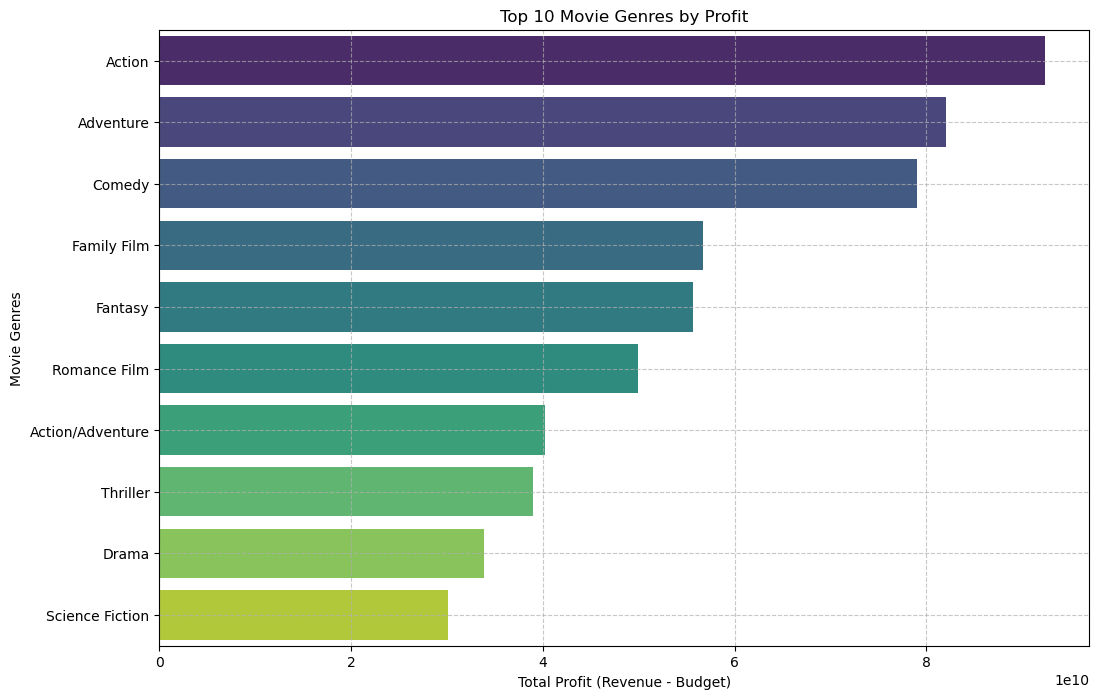

In [31]:
# Calculate profit (revenue - budget) 

merged_movies_scraped_budget['movie_genres'] = merged_movies_scraped_budget['movie_genres'].apply(parse_genres)

merged_movies_scraped_budget['profit'] = merged_movies_scraped_budget['movie_box_office_revenue_x'] - merged_movies_scraped_budget['budget']

# Explode the genres to have one genre per row
movies_genres_exploded = merged_movies_scraped_budget.explode('movie_genres')

# Group by genre and sum the profits
profit_by_genre = movies_genres_exploded.groupby('movie_genres')['profit'].sum().reset_index()

# Sort by profit in descending order
profit_by_genre = profit_by_genre.sort_values(by='profit', ascending=False)

# Plot the top 10 genres by profit
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='movie_genres', data=profit_by_genre.head(10), palette='viridis')
plt.title('Top 10 Movie Genres by Profit')
plt.xlabel('Total Profit (Revenue - Budget)')
plt.ylabel('Movie Genres')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

We do notice that comedy movies are the most profitable ones !

# Commercial successes

In [32]:
# Calculate profit (revenue - budget)
merged_movies_scraped_budget['profit'] = merged_movies_scraped_budget['movie_box_office_revenue_x'] - merged_movies_scraped_budget['budget']

# Calculate profitability ratio (profit/budget)
merged_movies_scraped_budget['profitability_ratio'] = merged_movies_scraped_budget['profit'] / merged_movies_scraped_budget['budget']

# Filter out movies with missing budget or revenue
merged_movies_scraped_budget = merged_movies_scraped_budget.dropna(subset=['budget', 'movie_box_office_revenue_x'])

Which movies are the most profitable ones ? We also compute a profitability ratio, as profit divided by budget

In [33]:
# Descriptive statistics
# Top 10 most profitable movies by profit
top_10_profit = merged_movies_scraped_budget.nlargest(10, 'profit')

# Top 10 most profitable movies by profitability ratio
top_10_profitability_ratio = merged_movies_scraped_budget.nlargest(10, 'profitability_ratio')

print("\nTop 10 Movies by Profit:\n", top_10_profit[['movie_name', 'profit']])
print("\nTop 10 Movies by Profitability Ratio:\n", top_10_profitability_ratio[['movie_name', 'profitability_ratio']])


Top 10 Movies by Profit:
                                          movie_name        profit
2366                                         Avatar  2.545275e+09
2207                                        Titanic  1.985372e+09
2810                                   The Avengers  1.291758e+09
3045  Harry Potter and the Deathly Hallows – Part 2  1.203111e+09
7954  The Lord of the Rings: The Return of the King  1.025930e+09
1864                 Transformers: Dark of the Moon  9.287470e+08
4960        Star Wars Episode I: The Phantom Menace  9.120447e+08
2138                                  The Lion King  9.065838e+08
6846                                    Toy Story 3  8.631719e+08
6199                                  Jurassic Park  8.516911e+08

Top 10 Movies by Profitability Ratio:
                     movie_name  profitability_ratio
5792       Paranormal Activity         12889.386667
3760                Wide Awake          4568.126000
3109        The Last Broadcast          4443.444444

The movie "The Last Broadcast" is interesting, it only costed 900 dollars to be produced and it generatd 4 millions of dollars as worldwide revenue. The film was made on a budget of $900, and edited on a desktop computer using Adobe Premiere 4.2. $600 was allocated for production, while $240 were utilized for digital video stock, and twenty hours of tape for $12 each. see https://en.wikipedia.org/wiki/The_Last_Broadcast_(film).

Q1 (25th percentile): -3271112.0
Q3 (75th percentile): 37215759.0
IQR (Interquartile Range): 40486871.0
Lower bound for outliers: -64001418.5
Upper bound for outliers: 97946065.5
Max absolute profit value for centering x-axis: 97920733.0


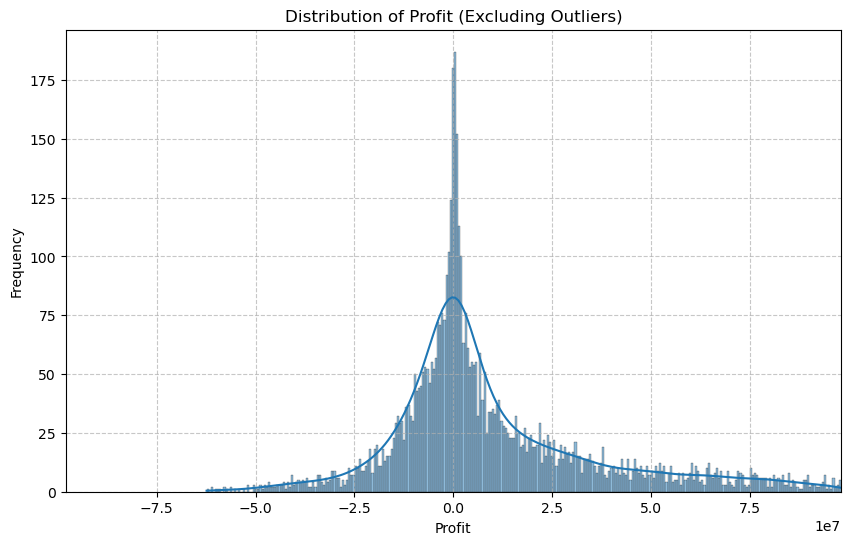

In [34]:
# Calculate the IQR to filter out outliers
Q1 = merged_movies_scraped_budget['profit'].quantile(0.25)
Q3 = merged_movies_scraped_budget['profit'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
filtered_profits = merged_movies_scraped_budget[(merged_movies_scraped_budget['profit'] >= lower_bound) & (merged_movies_scraped_budget['profit'] <= upper_bound)]['profit']

# Calculate the maximum absolute profit value for centering the x-axis
max_abs_profit = max(abs(filtered_profits.min()), abs(filtered_profits.max()))

# Print the calculated values
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
print(f"Max absolute profit value for centering x-axis: {max_abs_profit}")

plt.figure(figsize=(10, 6))
sns.histplot(filtered_profits, bins=300, kde=True)
plt.title('Distribution of Profit (Excluding Outliers)')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

# Center the x-axis around 0
plt.xlim(-max_abs_profit, max_abs_profit)

plt.show()

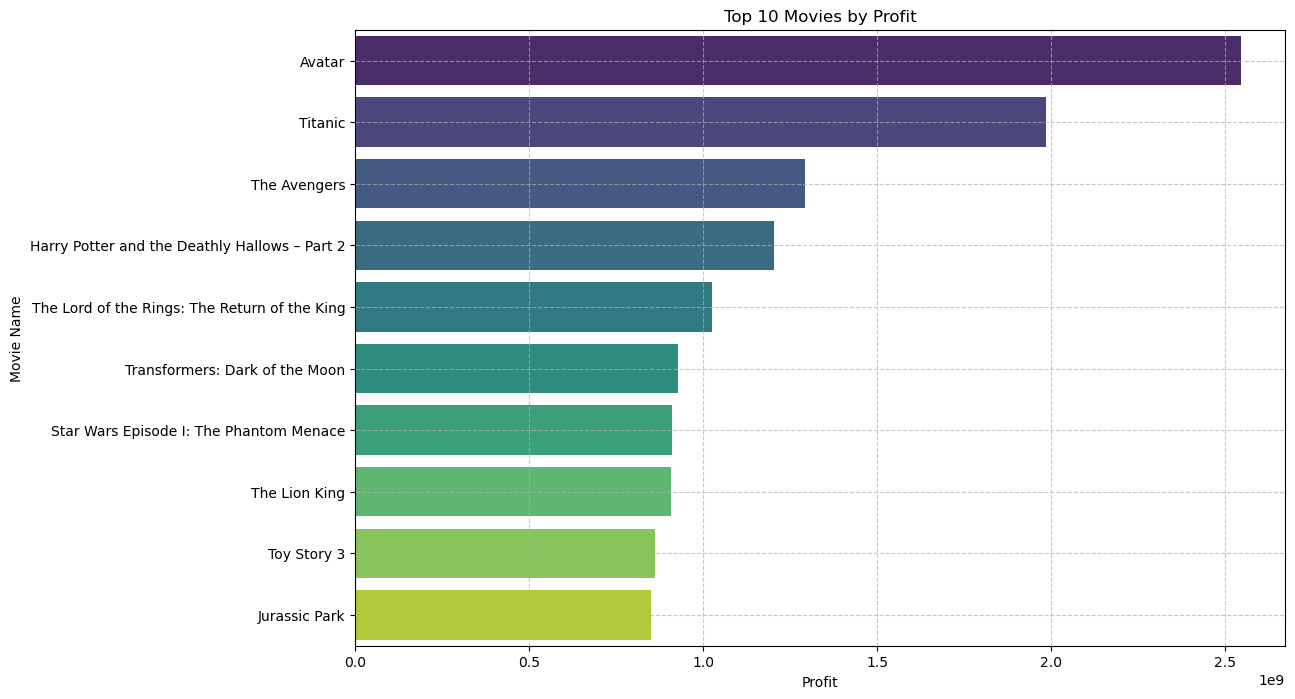

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='movie_name', data=top_10_profit, palette='viridis')
plt.title('Top 10 Movies by Profit')
plt.xlabel('Profit')
plt.ylabel('Movie Name')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

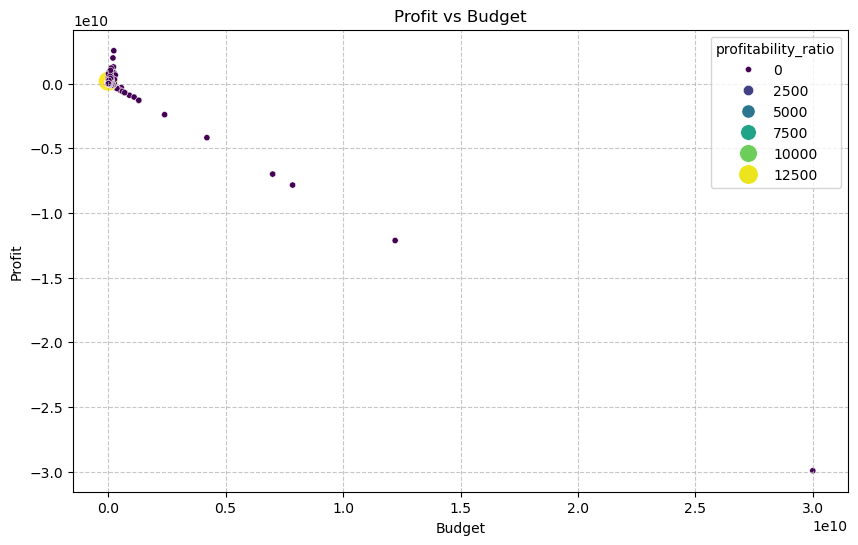

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='profit', data=merged_movies_scraped_budget, hue='profitability_ratio', palette='viridis', size='profitability_ratio', sizes=(20, 200))
plt.title('Profit vs Budget')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

On this plot, we do notice that some movies have a very high budget (13 billions or even 30 billions), this is because the unit for them is not in dollars but in won, yen or THB. For the Milestone 3, a new scraping will be executed to be sure that the scrapped values are in dollars. A new scatter plot as such will be runned to be sure that all values are consistent.

In [37]:
# Define the conversion rate from won to dollars (example rate: 1 won = 0.00084 USD)
conversion_rate = 0.00084

# Identify the movie with ID 465
movie_id = 154688
korean_movie = merged_movies_scraped_budget[merged_movies_scraped_budget['wikipedia_movie_id'] == movie_id]

# Check if the movie exists
if not korean_movie.empty:
    # Convert the budget from won to dollars for this movie
    merged_movies_scraped_budget.loc[korean_movie.index, 'budget'] = korean_movie['budget'] * conversion_rate

    # Verify the conversion
    print(f"Movie ID: {movie_id}")
    print(f"Original Budget: {korean_movie['budget'].values[0]}")
    print(f"Converted Budget: {merged_movies_scraped_budget.loc[korean_movie.index, 'budget'].values[0]}")
else:
    print(f"Movie with ID {movie_id} not found in the dataset.")

# Continue with the updated dataset
len(merged_movies_scraped_budget)

Movie ID: 154688
Original Budget: 7850000000.0
Converted Budget: 6594000.0


5893

So about 4.5 million dollars as mean profit for movies !

# **6. Extracting a Plot Structure for the plot summaries**

The goal here is to **process movie plot summaries to identify their underlying plot structures**. By categorizing each summary according to distinct narrative patterns, we aim to gain insights into common plot structures and explore potential correlations with financial success.

To achieve this, we experimented with **two different approaches**:

1. **Clustering**: We used unsupervised clustering (KMeans) on plot summaries to explore any emergent plot structure patterns.

2. **Large Language Model (LLM) Classification**: Using a predefined set of 15 plot structure categories, we use a LLM to classify each summary. This classification approach uses zero-shot prompting to assign each summary to a category.

A method resumed in summaries.py file allows to create a CSV with all the informations needed 

In [38]:
# We load the data after the preprocessing but before the scraping
movies_summary = pd.read_csv('data/processed/movies_summary_BO.csv')

In [414]:
movies_summary.head()

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,plot_summary
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...","Set in the second half of the 22nd century, th..."
1,171005,/m/016ywb,Henry V,1989.0,10161099.0,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
2,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",The film opens with Mary Poppins perched in a...
3,156558,/m/014k4y,Baby Boy,2001.0,29381649.0,123.0,['English Language'],['United States of America'],"['Crime Fiction', 'Drama', 'Coming of age']",A young 20-year-old named Jody lives with his...
4,261237,/m/01mrrd,The Gods Must Be Crazy,1980.0,34331783.0,109.0,"['Afrikaans Language', 'English Language']",['South Africa'],"['Adventure', 'Action/Adventure', 'Indie', 'Wo...",The film is a collision of three separate stor...


## **6.1 Clustering**

### Vectorization of the summaries

First, we transform the plot summaries into a numerical format for clustering by applying **TF-IDF (Term Frequency-Inverse Document Frequency) vectorization**. TF-IDF highlights important words in each summary by reducing the weight of common terms and increasing the importance of unique terms.

In [415]:
# Text Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_summary['plot_summary'])

combined_matrix = tfidf_matrix.toarray()

### Clustering using KMeans

Now, we use **KMeans clustering** to group the plot summaries based on their TF-IDF representations. This step aims to identify distinct plot structure patterns by clustering similar summaries together.

The clustering labels are added to the dataset, allowing us to analyze plot structure patterns within each identified cluster.

To determine the optimal number of clusters, we plotted the **silhouette score** for cluster values ranging from 5 to 20. Typically, an ideal number of clusters shows a **peak in the silhouette score**.

However, in our plot, the silhouette score continually increases as the number of clusters increases.

Given these results, we will proceed with **15 clusters**. This number provides a balance between interpretability and granularity, allowing us to capture a range of plot structures without creating an excessive number of small, indistinct clusters.

In [416]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(5, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    labels = kmeans.fit_predict(combined_matrix)
    score = silhouette_score(combined_matrix, labels)
    silhouette_scores.append(score)

We can now visualize the results :

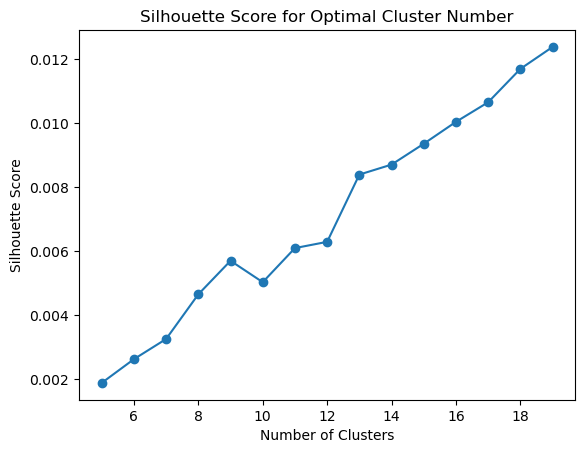

In [417]:
plt.plot(range(5, 20), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal Cluster Number")
plt.show()

In [418]:
# Clustering with KMeans
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
movies_summary['plot_structure_cluster'] = kmeans.fit_predict(combined_matrix)

In [419]:
movies_summary['plot_structure_cluster'].value_counts()

plot_structure_cluster
6     3760
1     1490
4      736
3      515
9      420
13     252
8      167
12     135
14     110
0       86
2       79
7       75
10      58
11      47
5       43
Name: count, dtype: int64

In [420]:
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(combined_matrix)
X_reduced_pca = PCA(n_components=2).fit(combined_matrix).transform(combined_matrix)

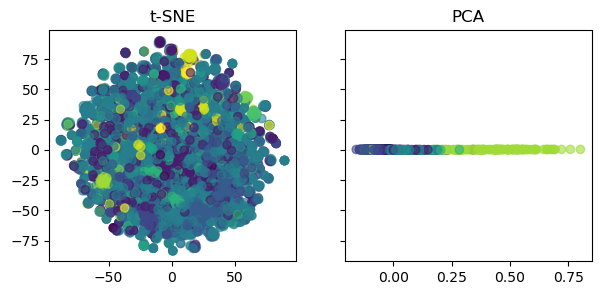

In [421]:
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)

# Cluster the data in 3 groups
labels = movies_summary['plot_structure_cluster']

# Plot the data reduced in 2d space with t-SNE
axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6)
axs[0].set_title("t-SNE")

# Plot the data reduced in 2d space with PCA
axs[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=labels, alpha=0.6)
axs[1].set_title("PCA")

plt.show()

The **distribution of plot summaries across clusters** shows that the clustering algorithm has created some clusters with a significantly higher number of summaries than others. The top three clusters (2, 10, and 7) collectively hold a large portion of the summaries, indicating that certain plot structures may be more common. We have to dive more in the clusters.

**Top Terms per Cluster**

To gain a better understanding of each cluster's underlying plot structure, we examine the **top terms** associated with each cluster. By averaging the **TF-IDF values** of terms within each cluster, we identify the 10 most representative words for each group. This allows us to interpret the clusters.

In [422]:
# Cluster Interpretation
# Get the top terms per cluster by averaging the TF-IDF values of the terms in each cluster
terms = tfidf_vectorizer.get_feature_names_out()
cluster_centers = kmeans.cluster_centers_
top_terms_per_cluster = []

for i in range(n_clusters):
    top_terms_idx = cluster_centers[i].argsort()[-10:]  # Top 10 terms per cluster
    top_terms_per_cluster.append([terms[idx] for idx in top_terms_idx])

# Display top terms per cluster for interpretation
for i, terms in enumerate(top_terms_per_cluster):
    print(f"Cluster {i+1} top terms: {', '.join(terms)}")

Cluster 1 top terms: horses, speed, money, father, car, win, cole, horse, kid, race
Cluster 2 top terms: killed, killer, kill, house, murder, gang, man, car, frank, police
Cluster 3 top terms: adam, friend, home, new, wife, alex, elizabeth, beth, kate, nick
Cluster 4 top terms: space, captain, island, planet, dr, bond, alien, crew, earth, ship
Cluster 5 top terms: japanese, camp, american, battle, general, men, soldiers, army, king, war
Cluster 6 top terms: hank, gwen, money, family, nell, new, charlie, sal, eva, eddie
Cluster 7 top terms: man, home, young, new, life, love, mother, family, father, film
Cluster 8 top terms: freddy, ed, father, charlie, new, lee, love, charley, jerry, alice
Cluster 9 top terms: wife, life, family, new, elizabeth, house, mother, father, mary, john
Cluster 10 top terms: student, football, players, teacher, coach, students, high, game, team, school
Cluster 11 top terms: curse, vincent, father, bobby, life, money, man, kevin, kate, max
Cluster 12 top terms: 

### Interpretation of Cluster Themes

Here’s an interpretation of each cluster based on the top terms:

- **Cluster 1**: Plots focused on competitive themes.
- **Cluster 2**: Crime or thriller themes, involving murder, gangs, and police confrontations.
- **Cluster 3**: Domestic and family-centered stories.
- **Cluster 4**: Sci-fi or adventure narratives set in space or otherworldly environments.
- **Cluster 5**: War or historical battle narratives, with themes of patriotism, loyalty, and military conflict.
- **Cluster 6**: Family dynamics involving financial or personal struggles, often with a focus on character growth.
- **Cluster 7**: Stories focused on love, personal growth, and the journey of family relationships.
- **Cluster 8**: Character-driven drama with themes of love, relationships, and family life.
- **Cluster 9**: Domestic dramas with family relationships at the center, often involving parents, spouses, and home life.
- **Cluster 10**: School or sports settings, focusing on themes of teamwork, mentorship, and competition.
- **Cluster 11**: Plots involving curses or superstitions, with an emphasis on individual struggles with fate or financial issues.
- **Cluster 12**: Family and relationship-centered stories, possibly featuring complex dynamics within close-knit communities.
- **Cluster 13**: Family-focused narratives often with themes of life challenges, father-son relationships, or personal introspection.
- **Cluster 14**: Stories about family dynamics and personal relationships, with a recurring theme of domestic settings.
- **Cluster 15**: Family-centered dramas, often highlighting parent-child dynamics and personal development.


Each cluster reveals distinct themes and settings. While this analysis helps to identify common elements within each group, **we are not fully satisfied with this approach** as it appears to capture **genre and themes more than specific plot structures**.

Since our goal is to identify different types of plot structures, clustering based solely on keywords may lack the depth needed to capture narrative progression and plot dynamics. Consequently, we explore alternative methods, such as leveraging large language models or deeper natural language processing techniques, to classify plot structures more accurately.

## **6.2 Large Language Model (LLM) Classification**

In this section, we employ LLMs to classify plot summaries into specific plot structure categories.

Given that 75% of the summaries exceed 729 words, they often surpass typical model token limits (1024 tokens). To address this, we first summarize long plot summaries using `facebook/bart-large-cnn`, reducing their length.

Once the summaries are manageable in size, we classify each summary using a zero-shot classification pipeline (`facebook/bart-large-mnli`). This approach allows us to categorize the plot structures without additional training, leveraging the model’s pre-trained capabilities for reliable categorization.

In [423]:
# print stats about len of summaries
print(movies_summary['plot_summary'].apply(lambda x: len(x.split())).describe())

count    7973.000000
mean      510.714411
std       349.780783
min        17.000000
25%       201.000000
50%       501.000000
75%       729.000000
max      3546.000000
Name: plot_summary, dtype: float64


## 6.2.1 Summarization

To generate the summarized version of the plot summaries, we run the script ```src/summaries.py```. 
We are using a pre-trained transformer model (`facebook/bart-large-cnn`). Here's an overview of what this script achieves:

1. **Text Preprocessing**:
   - Cleans and normalizes plot summaries by removing unnecessary characters and whitespace.
   - Splits long texts into manageable chunks at sentence boundaries to fit the model's input token limit (1024 tokens).

2. **Summarization**:
   - Processes each chunk of text through the model to generate intermediate summaries.
   - Combines these intermediate summaries and processes the result to create a final, concise summary for each plot.
   - When the summary is short enough, we keep it as it is whithout using the LLM.

3. **Batch Processing**:
   - Summarizes plot summaries in batches.

4. **Output**:
   - A final CSV file is created with the movies dataframe completed with our new feature ```summarized```.

##### Implementation details of the summarization pipeline

1. **Text Length Optimization**:
   - For texts under 600 words, the original text is preserved
   - This threshold was chosen to maintain detail in already concise summaries while optimizing processing time
   - Longer texts undergo the full summarization pipeline

2. **Chunking Mechanism**:
   - Long texts are split into manageable chunks at sentence boundaries
   - Maximum chunk length is set to 1024 tokens
   - Preserves semantic coherence by maintaining sentence integrity
   - Prevents information loss that could occur with arbitrary truncation

3. **Two-Stage Summarization**:
   - First stage: Each chunk is summarized independently
   - Second stage: Chunk summaries are combined and summarized again
   - Parameters are tuned differently for each stage:
     - Chunk summaries: 30-150 tokens
     - Final summary: 50-200 tokens

5. **Model Configuration**:
   - Uses facebook/bart-large-cnn model
   - Beam search with 4 beams for better quality (suggested by GPT4o & huggingface)
   - Length penalty of 1.5 to encourage informative summaries (suggested by GPT4o & huggingface)
   - No-repeat ngram size of 2 to prevent repetition (suggested by GPT4o & huggingface)

Note: we divided the summaries into chunks of 1024 tokens to fit the model's input token limit. Having bigger chunks would have crashed the GPU due to memory issues with Izar cluster.

## 6.2.2 Zero-shot Classification


After having our summarized plot summaries, we create our pipeline for classification, and classify our summarized plot summaries into plot structure categories.

To classify our plot structure we use the script ```src/classify.py```.

We use the pre-trained transformer model (`facebook/bart-large-mnli`) for zero-shot classification of movie plot summaries, since the model fits perfectly our task. Here's an overview of the script's functionality:

1. **Model Initialization**:
   - Loads the `facebook/bart-large-mnli` model for zero-shot classification.

2. **Predefined Categories**:
   - Defines a comprehensive list of candidate labels that represent various plot structures (examples: "Hero’s Journey and Transformation," "Crime and Underworld Exploration").

3. **Text Classification**:
   - Processes each plot summary using the zero-shot classification pipeline.
   - The model predicts the most likely category for each summary from the predefined list of labels.

4. **Output**:
   - Saves the final dataframe to ````data/processed/movies_with_classifications.csv````.

To create the list of plot structure categories, we synthesized from several narrative frameworks:

•⁠  ⁠*The Seven Basic Plots* by Christopher Booker:([campfirewriting.com](https://www.campfirewriting.com/learn/narrative-structure))

•⁠  ⁠*The Hero's Journey* by Joseph Campbell: ([campfirewriting.com](https://www.campfirewriting.com/learn/narrative-structure))

•⁠  ⁠*Freytag's Pyramid*: ([blog.reedsy.com](https://blog.reedsy.com/guide/story-structure/))

Additionally, since we use zero-shot classification, we adapted the categories to be distinct and descriptive enough for the model to differentiate between them.

Here are the 15 candidate categories :

1. **Hero’s Journey and Transformation**: The protagonist undergoes personal growth, starting as an ordinary individual who faces challenges, gains allies, overcomes obstacles, and returns transformed.
2. **Quest for Vengeance or Justice**: A revenge-driven plot where the protagonist seeks retribution or justice for a past wrong or injustice.
3. **Coming of Age and Self-Discovery**: The protagonist matures or gains self-awareness, often overcoming personal or societal obstacles.
4. **Survival or Escape**: The story revolves around characters trying to survive dangerous situations or escape captivity.
5. **Rise and Fall of a Protagonist**: The protagonist experiences a rise to power or success, followed by a tragic or inevitable downfall.
6. **Love and Relationship Dynamics**: Focuses on romantic or family relationships, often dealing with misunderstandings, unions, reconciliations, or unfulfilled love.
7. **Comedy of Errors or Misadventure**: Characters experience humorous, unintended consequences or misadventures while pursuing a goal.
8. **Crime and Underworld Exploration**: The story explores criminal activities or the underworld, often involving heists, gang conflicts, or undercover missions.
9. **Power Struggle and Betrayal**: Focuses on conflicts for power or leadership, with betrayal as a central theme, often involving shifting alliances.
10. **Mystery and Conspiracy Unveiling**: The protagonist uncovers a hidden conspiracy, solves puzzles, or discovers hidden truths.
11. **Tragedy and Inevitability**: A character-driven plot where the protagonist faces an inevitable negative outcome, often due to a flaw or external betrayal.
12. **Conflict with Supernatural or Unknown Forces**: The protagonist encounters supernatural entities, unknown forces, or sci-fi elements that pose existential challenges.
13. **Comedy in Domestic Life**: Focuses on the humor and challenges of family life, with everyday misunderstandings and domestic issues driving the plot.
14. **Social Rebellion or Fight Against Oppression**: The protagonist challenges societal norms or oppressive systems, leading to personal or collective change.
15. **Fantasy or Science Fiction Quest**: Centers on a journey or quest in a fantastical or sci-fi setting, involving world-building, encounters with non-human entities, and mythical or technological challenges.


##### Implementation details of the zero-shot classification pipeline

The classification process is implemented in `src/classify.py` with several key components designed for efficient and accurate plot structure categorization:

1. **Model Architecture**:
   - Uses facebook/bart-large-mnli model
   - Chosen for zero-shot classification capabilities
   - Pre-trained on diverse text understanding tasks
   - Optimized for multi-class classification without additional training

2. **Label Engineering**:
   - Narrative descriptions for each category
   - Categories designed to capture plot elements
   - We tried to minimize overlap between categories

3. **Processing Pipeline**:
   - Batch processing for efficiency
   - Checkpoint system every 5 batches with GPU handling to not lose our progression

4. **Output Structure**:
   - Preserves original movie metadata
   - Adds plot_structure classification for 15 and 20 categories


## 6.2.3 Try classification with different categories


Finally we tried the same zero-shot classification with different candidate categories. The goal is to capture a broader range of narrative structures

Here are the alternative categories :
1. **Relentless Pursuit**: The protagonist is continuously pursued by a formidable opponent or authority, ending in a final showdown or escape.
2. **Memory Recovery**: The protagonist suffers from memory loss and gradually uncovers their past identity and purpose, often leading to a significant revelation or reunion.
3. **Inheritance of Duty**: A character inherits an extraordinary responsibility, skill, or artifact, which they must protect or learn to wield, typically involving rigorous challenges.
4. **Ordinary to Extraordinary Journey**: An unsuspecting character is drawn into an epic journey, evolving through obstacles to fulfill a unique role they initially resisted or doubted.
5. **Countdown Crisis**: Characters face a strict deadline, solving complex problems or overcoming obstacles before time runs out to avert disaster.
6. **High-Stakes Rescue**: The plot centers on rescuing a person or group from peril, often requiring the protagonist to confront significant physical or moral dilemmas.
7. **Breakout Plot**: The protagonist begins in captivity and must plan and execute an escape, often by navigating complex social or environmental challenges.
8. **Amnesiac Reunion**: Following separation and loss of memory, characters are reunited after a series of incidental encounters gradually restore memories.
9. **Redemption Arc**: A flawed or once-villainous character seeks redemption, confronting their past through sacrifice or atonement.
10. **Hidden Power Awakening**: A character discovers hidden abilities and must undergo training, typically to prepare for a unique challenge or mission.
11. **Unlikely Alliance**: Disparate characters join forces to achieve a shared goal, learning to overcome differences and trust each other to succeed.
12. **Revolutionary Uprising**: The protagonist and allies challenge an oppressive authority, with the story leading to a climactic confrontation or overthrow.
13. **Guardian Mission**: The protagonist is tasked with safeguarding a vulnerable individual, group, or object, navigating multiple threats to fulfill their protective role.
14. **Duel for Justice**: The storyline builds toward a climactic one-on-one duel, often against a personal nemesis, to settle a longstanding score or defend a cause.
15. **Treasure Hunt**: Characters compete to uncover a coveted object or location, leading to rivalries, alliances, and betrayals along the way.
16. **Mistaken Identity Spiral**: A character is misidentified or assumed to be someone else, resulting in escalating misunderstandings they must unravel.
17. **Rise to Downfall**: The protagonist rises to prominence but faces a dramatic fall, often due to personal flaws or betrayal, leading to a period of reckoning.
18. **Parallel Journeys**: Two main characters embark on distinct but intersecting journeys, with their paths influencing each other toward a shared conclusion.
19. **Mission to Save a Community**: The protagonist works to save or uplift their community from a specific threat, often gaining respect or unity along the way.
20. **Discovery Expedition**: A journey or exploration driven by curiosity or necessity, uncovering significant discoveries or secrets that impact the characters or world.
21. **Comedy of Errors or Misadventure**: Characters experience humorous, unintended consequences or misadventures while pursuing a goal.
22. **Fantasy or Science Fiction Quest**: Journey in a fantastical or sci-fi setting.
23. **Survival or Escape**: The story revolves around characters trying to survive dangerous situations or escape captivity.

# 6.3 Classification and movie revenues and profit based on plot structures


Using here the results from the zero-shot classification :

In [50]:
classified_summaries = pd.read_csv('data/processed/movies_with_classifications.csv')

In [51]:

movies_clean = pd.read_csv('data/processed/modified_merged_movies.csv', sep=',')

# Merge the dataframes on 'wikipedia_movie_id'
merged_movies = pd.merge(movies_clean, imdb_additional_movies_df, on='wikipedia_movie_id')

# Drop the 'box_office_revenue' column


# Merge the dataframes on 'wikipedia_movie_id', 'release_year', and 'freebase_movie_id'
merged_movies = pd.merge(movies, classified_summaries, on=['wikipedia_movie_id', 'movie_release_date', 'freebase_movie_id'])
merged_movies = merged_movies.drop(columns=['movie_box_office_revenue'])
# Verify the merge
merged_movies.head()  


,wikipedia_movie_id,freebase_movie_id,movie_name_x,movie_release_date,movie_box_office_revenue_x,movie_runtime_x,movie_languages_x,movie_countries_x,movie_genres_x,movie_name_y,movie_runtime_y,movie_languages_y,movie_countries_y,movie_genres_y,plot_summary,summarized,plot_structure,plot_structure_20
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,['English Language'],['United States of America'],"[Thriller, Science Fiction, Horror, Adventure,...",Ghosts of Mars,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...","Set in the second half of the 22nd century, th...","Set in the second half of the 22nd century, th...",Conflict with Supernatural or Unknown Forces: ...,Comedy of Errors or Misadventure: Characters e...
1,171005,/m/016ywb,Henry V,1989.0,10161099.0,137.0,['English Language'],['United Kingdom'],"[Costume drama, War film, Epic, Period piece, ...",Henry V,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,Rise and Fall of a Protagonist: The protagonis...,Unlikely Alliance: Disparate characters join f...
2,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,['English Language'],['United States of America'],"[Children's/Family, Musical, Fantasy, Comedy, ...",Mary Poppins,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",The film opens with Mary Poppins perched in a...,The film opens with Mary Poppins perched in a ...,Hero’s Journey and Transformation: The protago...,Comedy of Errors or Misadventure: Characters e...
3,156558,/m/014k4y,Baby Boy,2001.0,29381649.0,123.0,['English Language'],['United States of America'],"[Crime Fiction, Drama, Coming of age]",Baby Boy,123.0,['English Language'],['United States of America'],"['Crime Fiction', 'Drama', 'Coming of age']",A young 20-year-old named Jody lives with his...,A young 20-year-old named Jody lives with his ...,Coming of Age and Self-Discovery: The protagon...,Comedy of Errors or Misadventure: Characters e...
4,261237,/m/01mrrd,The Gods Must Be Crazy,1980.0,34331783.0,109.0,"['Afrikaans Language', 'English Language']",['South Africa'],"[Adventure, Action/Adventure, Indie, World cin...",The Gods Must Be Crazy,109.0,"['Afrikaans Language', 'English Language']",['South Africa'],"['Adventure', 'Action/Adventure', 'Indie', 'Wo...",The film is a collision of three separate stor...,The film is a collision of three separate stor...,Hero’s Journey and Transformation: The protago...,Parallel Journeys: Two main characters embark ...


In [52]:
# Update the 'plot_structure' column to only take elements before the first ":"
merged_movies['plot_structure'] = merged_movies['plot_structure'].str.split(':').str[0]

# Verify the changes
print(merged_movies[['plot_structure']].head())

# Save the updated dataset back to a CSV file if needed

                                 plot_structure
0  Conflict with Supernatural or Unknown Forces
1                Rise and Fall of a Protagonist
2             Hero’s Journey and Transformation
3              Coming of Age and Self-Discovery
4             Hero’s Journey and Transformation


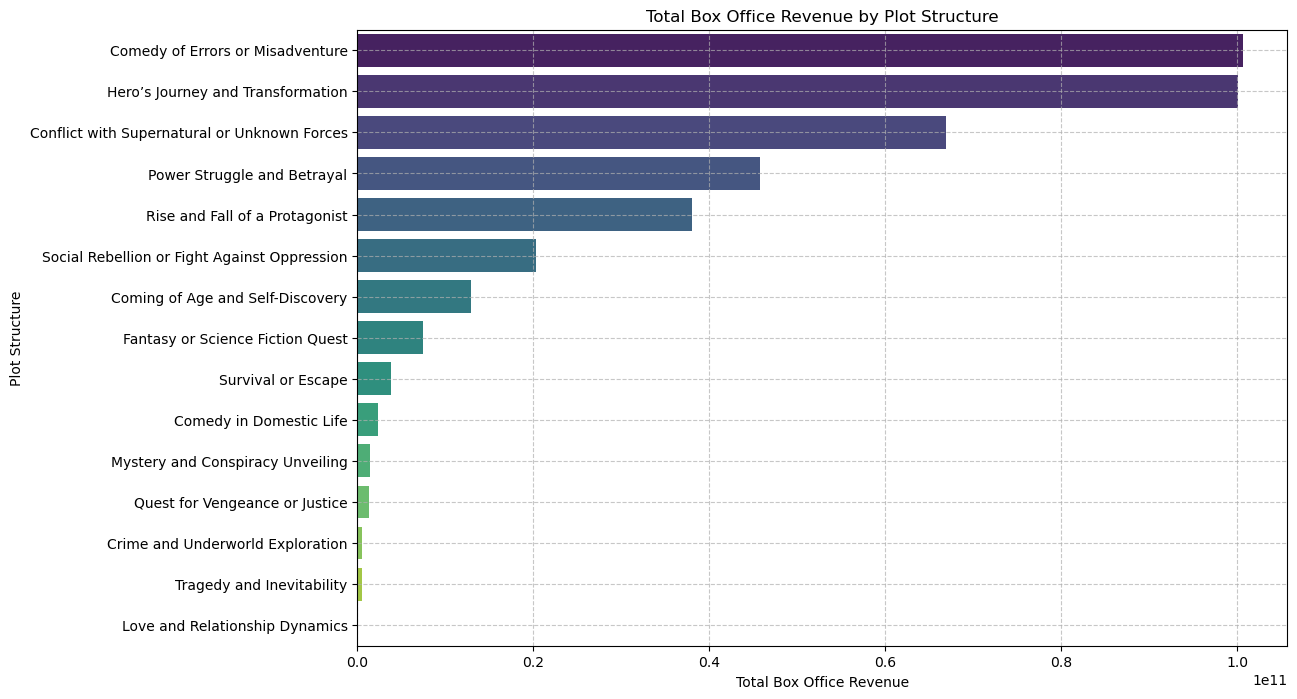

In [53]:
revenue_by_plot_structure = merged_movies.groupby('plot_structure')['movie_box_office_revenue_x'].sum().reset_index()

# Sort by revenue in descending order
revenue_by_plot_structure = revenue_by_plot_structure.sort_values(by='movie_box_office_revenue_x', ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='movie_box_office_revenue_x', y='plot_structure', data=revenue_by_plot_structure, palette='viridis')
plt.title('Total Box Office Revenue by Plot Structure')
plt.xlabel('Total Box Office Revenue')
plt.ylabel('Plot Structure')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

It's noticeable here that it's very close to movies genres in terms of revenues, as here, comedy of errors and hero's journety are the two categories that generates the highest revenues. We now merge with the results of the IMDb scrapping to check the profit linked to each plot_structure, to see if there may be a certain plot structure that is generating high profits.

In [54]:
imdb_additional_movies_df = pd.read_csv('data/processed/scraped_data_all.csv')


In [55]:
merged_movies.head()  

,wikipedia_movie_id,freebase_movie_id,movie_name_x,movie_release_date,movie_box_office_revenue_x,movie_runtime_x,movie_languages_x,movie_countries_x,movie_genres_x,movie_name_y,movie_runtime_y,movie_languages_y,movie_countries_y,movie_genres_y,plot_summary,summarized,plot_structure,plot_structure_20
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,['English Language'],['United States of America'],"[Thriller, Science Fiction, Horror, Adventure,...",Ghosts of Mars,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...","Set in the second half of the 22nd century, th...","Set in the second half of the 22nd century, th...",Conflict with Supernatural or Unknown Forces,Comedy of Errors or Misadventure: Characters e...
1,171005,/m/016ywb,Henry V,1989.0,10161099.0,137.0,['English Language'],['United Kingdom'],"[Costume drama, War film, Epic, Period piece, ...",Henry V,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,Rise and Fall of a Protagonist,Unlikely Alliance: Disparate characters join f...
2,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,['English Language'],['United States of America'],"[Children's/Family, Musical, Fantasy, Comedy, ...",Mary Poppins,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",The film opens with Mary Poppins perched in a...,The film opens with Mary Poppins perched in a ...,Hero’s Journey and Transformation,Comedy of Errors or Misadventure: Characters e...
3,156558,/m/014k4y,Baby Boy,2001.0,29381649.0,123.0,['English Language'],['United States of America'],"[Crime Fiction, Drama, Coming of age]",Baby Boy,123.0,['English Language'],['United States of America'],"['Crime Fiction', 'Drama', 'Coming of age']",A young 20-year-old named Jody lives with his...,A young 20-year-old named Jody lives with his ...,Coming of Age and Self-Discovery,Comedy of Errors or Misadventure: Characters e...
4,261237,/m/01mrrd,The Gods Must Be Crazy,1980.0,34331783.0,109.0,"['Afrikaans Language', 'English Language']",['South Africa'],"[Adventure, Action/Adventure, Indie, World cin...",The Gods Must Be Crazy,109.0,"['Afrikaans Language', 'English Language']",['South Africa'],"['Adventure', 'Action/Adventure', 'Indie', 'Wo...",The film is a collision of three separate stor...,The film is a collision of three separate stor...,Hero’s Journey and Transformation,Parallel Journeys: Two main characters embark ...


In [56]:
# Merge the dataframes on 'wikipedia_movie_id', 'release_year', and 'freebase_movie_id'
merged_movies = pd.merge(
    merged_movies,
    imdb_additional_movies_df,
    on=['wikipedia_movie_id'],
    how='inner'
)

In [57]:
merged_movies.head()

,wikipedia_movie_id,freebase_movie_id,movie_name_x,movie_release_date,movie_box_office_revenue_x,movie_runtime_x,movie_languages_x,movie_countries_x,movie_genres_x,movie_name_y,...,summarized,plot_structure,plot_structure_20,Unnamed: 0,movie_box_office_revenue,budget,opening_weekend,rating_score,producer,release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,['English Language'],['United States of America'],"[Thriller, Science Fiction, Horror, Adventure,...",Ghosts of Mars,...,"Set in the second half of the 22nd century, th...",Conflict with Supernatural or Unknown Forces,Comedy of Errors or Misadventure: Characters e...,1163,14010832.0,28000000.0,3804452.0,4.9,John Carpenter,2001.0
1,171005,/m/016ywb,Henry V,1989.0,10161099.0,137.0,['English Language'],['United Kingdom'],"[Costume drama, War film, Epic, Period piece, ...",Henry V,...,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,Rise and Fall of a Protagonist,Unlikely Alliance: Disparate characters join f...,1164,10161099.0,9000000.0,64933.0,7.5,Kenneth Branagh,1989.0
2,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,['English Language'],['United States of America'],"[Children's/Family, Musical, Fantasy, Comedy, ...",Mary Poppins,...,The film opens with Mary Poppins perched in a ...,Hero’s Journey and Transformation,Comedy of Errors or Misadventure: Characters e...,1165,103125597.0,6000000.0,NaN,7.8,Robert Stevenson,1965.0
3,156558,/m/014k4y,Baby Boy,2001.0,29381649.0,123.0,['English Language'],['United States of America'],"[Crime Fiction, Drama, Coming of age]",Baby Boy,...,A young 20-year-old named Jody lives with his ...,Coming of Age and Self-Discovery,Comedy of Errors or Misadventure: Characters e...,1166,29381649.0,16000000.0,8606403.0,6.5,John Singleton,2001.0
4,261237,/m/01mrrd,The Gods Must Be Crazy,1980.0,34331783.0,109.0,"['Afrikaans Language', 'English Language']",['South Africa'],"[Adventure, Action/Adventure, Indie, World cin...",The Gods Must Be Crazy,...,The film is a collision of three separate stor...,Hero’s Journey and Transformation,Parallel Journeys: Two main characters embark ...,1167,30031783.0,5000000.0,NaN,7.3,Jamie Uys,1984.0


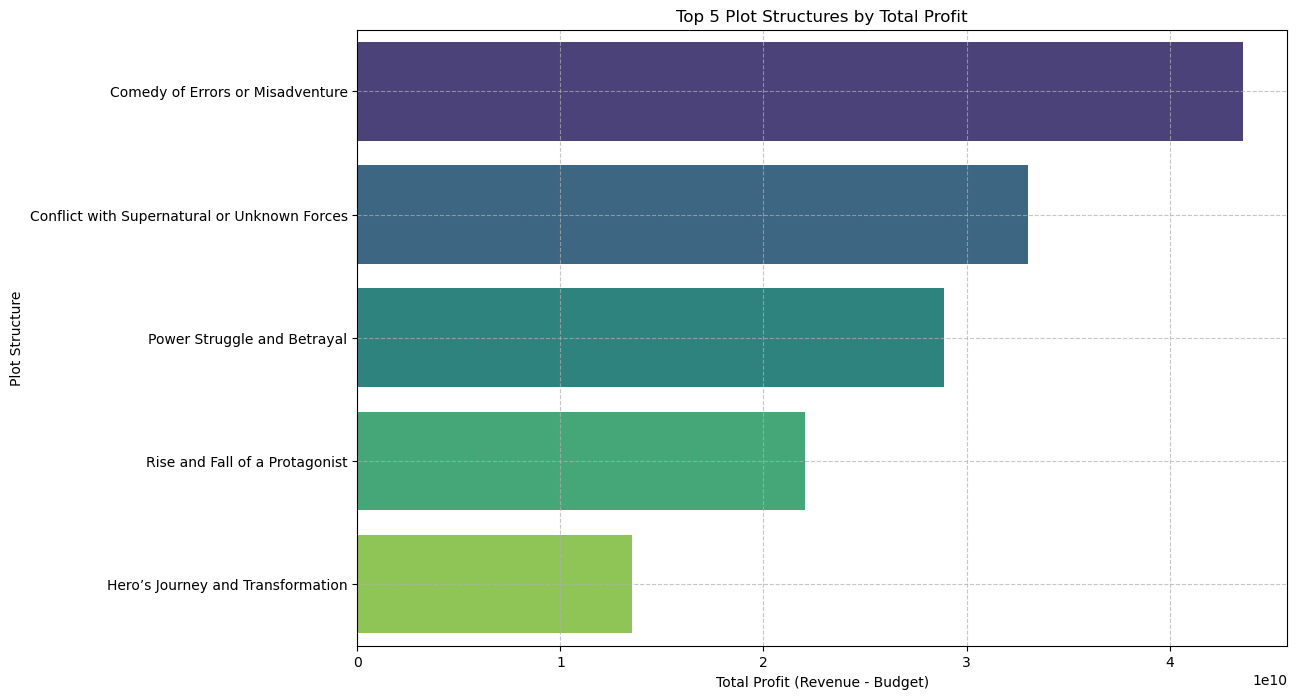

In [58]:
# Update the 'plot_structure' column to only take elements before the first ":"
merged_movies['plot_structure'] = merged_movies['plot_structure'].str.split(':').str[0]

# Calculate profit (revenue - budget)
merged_movies['profit'] = merged_movies['movie_box_office_revenue_x'] - merged_movies['budget']

# Group by plot_structure and sum the profits
profit_by_plot_structure = merged_movies.groupby('plot_structure')['profit'].sum().reset_index()

# Sort by profit in descending order and select the top 5
top_5_profit_by_plot_structure = profit_by_plot_structure.sort_values(by='profit', ascending=False).head(5)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='plot_structure', data=top_5_profit_by_plot_structure, palette='viridis')
plt.title('Top 5 Plot Structures by Total Profit')
plt.xlabel('Total Profit (Revenue - Budget)')
plt.ylabel('Plot Structure')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

As seen previously, comedy and action were the two genres generating the most profits, here it's the plot structures "hero's journey and transformation" and "comedy of errors or misadventure" that are generating the most.  

The choices of plot structures will be defined more precisely for Milestone 3.

 <font size="6">7. Inflation over the years</font>


A function that also takes into account inflation has been coded and will be used in Milestone 3, to also show the influence of inflation on rentability of movies and to conduct further analyses.

In [84]:
ds_inflation = kagglehub.dataset_download("pavankrishnanarne/us-inflation-dataset-1947-present")
df_inflation = pd.read_csv(os.path.join(ds_inflation, "US_inflation_rates.csv"))
local_path = "data/raw/inflation_data.csv"
os.makedirs(os.path.dirname(local_path), exist_ok=True)
df_inflation.to_csv(local_path, index=False)
print(f"Dataset saved to: {local_path}")  

Dataset saved to: data/raw/inflation_data.csv


This dataset contains historical inflation rates for the United States, from January 1947 to 2023. CPI is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.

In [85]:
df_inflation.sample(2)

,date,value
452,1984-09-01,104.700
869,2019-06-01,255.159


In [86]:
df_inflation['date'] = pd.to_datetime(df_inflation['date'])
df_inflation = df_inflation.set_index('date')

- Plotted the Consumer Price Index (CPI) values over time to show how they change from one date to the next.
- Calculated and plotted a linear trend line to show the overall direction of CPI values over time.

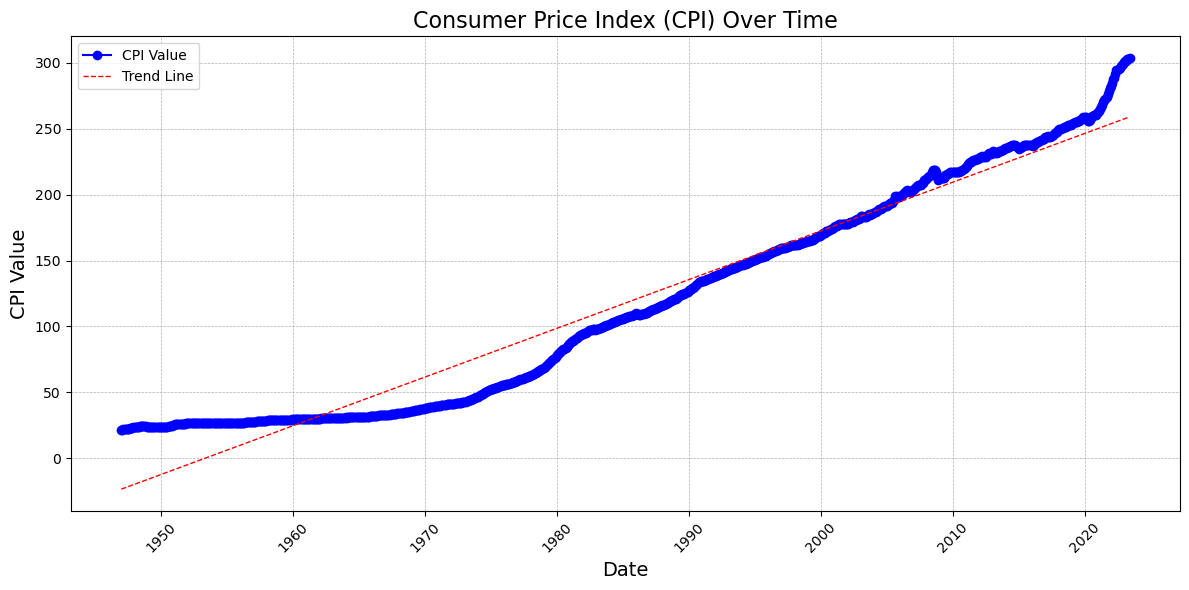

In [87]:
# Plot CPI values over time
plt.figure(figsize=(12, 6))
plt.plot(df_inflation.index, df_inflation['value'], marker='o', linestyle='-', color='b', linewidth=1.5)

plt.title("Consumer Price Index (CPI) Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("CPI Value", fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)

# Adding a trend line
ordinals = df_inflation.index.map(pd.Timestamp.toordinal)
z = np.polyfit(ordinals, df_inflation['value'], 1)
p = np.poly1d(z)
plt.plot(df_inflation.index, p(ordinals), "r--", linewidth=1, label='Trend Line')

plt.legend(["CPI Value", "Trend Line"], loc="upper left")
plt.tight_layout()
plt.show()

### Adjusting Movie Box Office Revenues for Inflation

We want to make movie box office revenues comparable across different release years by adjusting them for inflation. We use the Consumer Price Index (CPI) data to account for inflation and bring all revenues to a common base year. This way, we can fairly compare the earnings of movies released in different years.

### Steps

- We start with CPI data indexed by date, which represents the inflation rate over time.
- We choose a **base year** (2023) to normalize all other CPI values.

- For each year in our CPI dataset, we calculate an **adjustment factor** by dividing the CPI value of the base year by the CPI of that specific year:


$$
\text{Adjustment Factor} = \frac{\text{CPI of Base Year}}{\text{CPI of Movie Year}}
$$


- Using the adjustment factors calculated above, we adjust each movie’s box office revenue based on its release year.

In [88]:
df_inflation.sample(2)

,value
date,
1995-08-01,152.900
2022-07-01,294.628


In [89]:
df_inflation = df_inflation.reset_index()
df_inflation['year'] = df_inflation['date'].dt.year
df_inflation = df_inflation.groupby('year')['value'].mean()

# Choose base year (the most recent CPI value for 2023)
base_year = 2023
cpi_base = df_inflation[base_year]

# Calculate adjustment factors for each year
df_inflation = cpi_base / df_inflation

In [90]:
movies_imdb = pd.read_csv("data/processed/modified_merged_movies.csv")
movies_imdb.shape  


(8889, 9)

In [91]:
movies_imdb.sample(2)

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue_x,movie_runtime,movie_languages,movie_countries,movie_genres
4034,35644709,/m/0kf9zj7,Camille Rewinds,2012.0,6810991.0,115.0,['French Language'],['France'],['Comedy film']
17,24282217,/m/07sb8_t,The Naked Kitchen,2009.0,638181.0,102.0,['Korean Language'],['South Korea'],"['World cinema', 'Comedy-drama', 'Drama', 'Com..."


We want to check for missing CPI values for each year in the movie dataset.

In [93]:
# Extract unique years from the movies dataset
movie_years = movies_imdb['movie_release_date'].dropna().unique()
# Extract available years from the CPI data
cpi_years = df_inflation.index.unique()

# Find years in movies that are missing in CPI data
missing_years = set(movie_years) - set(cpi_years)

# Display missing years
print("Years in movies data but missing in CPI data:", sorted(missing_years))

Years in movies data but missing in CPI data: [1897.0, 1914.0, 1915.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0]


For the missing year, we will use the closest available year’s CPI value

In [94]:
# Fill missing years by reindexing with a full range
all_years = pd.RangeIndex(start=min(df_inflation.index.min(), min(movie_years)),
                          stop=max(df_inflation.index.max(), max(movie_years)) + 1)
# Use closest available year’s CPI value
df_inflation = df_inflation.reindex(all_years).ffill().bfill()

In [95]:
movies_imdb = movies_imdb.dropna(subset=['movie_box_office_revenue_x', 'movie_release_date'])

movies_imdb.loc[:, 'adjusted_revenue'] = movies_imdb.apply(
    lambda x: x['movie_box_office_revenue_x'] * df_inflation.get(x['movie_release_date'], 1), axis=1
)

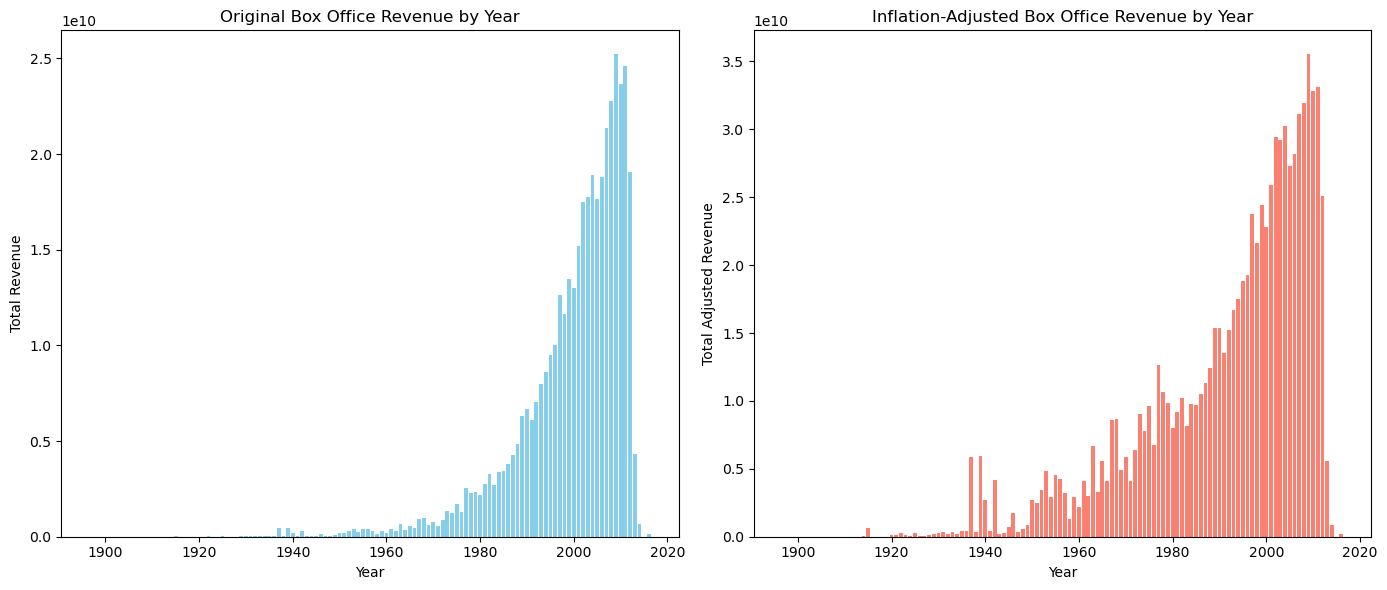

In [96]:
# Group by release year and calculate total revenue for each year
movies_by_year = movies_imdb.groupby('movie_release_date').agg({
    'movie_box_office_revenue_x': 'sum',
    'adjusted_revenue': 'sum'
}).reset_index()

# Plot original vs. inflation-adjusted revenues by year
plt.figure(figsize=(14, 6))

# Plot original revenue by year
plt.subplot(1, 2, 1)
plt.bar(movies_by_year['movie_release_date'], movies_by_year['movie_box_office_revenue_x'], color='skyblue')
plt.title("Original Box Office Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")

# Plot inflation-adjusted revenue by year
plt.subplot(1, 2, 2)
plt.bar(movies_by_year['movie_release_date'], movies_by_year['adjusted_revenue'], color='salmon')
plt.title("Inflation-Adjusted Box Office Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Adjusted Revenue")

plt.tight_layout()
plt.show()

Further analyses will be conducted for Milestone 3, taking into account inflation on movies revenues, budget and profits.

 <font size="6">8. Analyses of characters</font>


Analyses of characters will be conducted also for Milestone 3.